# EISCAT Data

In [1]:
import h5py
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import glob
import sys

%load_ext autoreload
%autoreload 2

# Get the absolute path of the project root (fpi_ml)
project_root = "/Users/elliotdable/Documents/PhD/research/fpi_ml"
sys.path.append(project_root)

# Now try importing using 'src.'
from src.load_data import eiscat_hdf5_loader

In [2]:
import numpy as np
import xarray as xr

# Now try importing using 'src.'
from src.load_data import eiscat_netCDF_loader, load_full_eiscat_netCDF_data

# Directory containing the files
directory = "/Users/elliotdable/Documents/PhD/research/fpi_ml/data/eiscat_data"

eiscat_df = load_full_eiscat_netCDF_data(directory)

Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in NetCDF format)...
File successfully loaded as an xarray.Dataset.
Attempting to load the file as an xarray.Dataset (e.g., if it is in N

In [3]:
eiscat_df['unix_time'] = (eiscat_df['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
eiscat_df = eiscat_df.dropna()
eiscat_df = eiscat_df.round(6).drop_duplicates()
eiscat_df.head()

,altitude,time,Ne,Te,Ti,Vi,Ne_err,Te_err,Ti_err,Vi_err,azimuth,elevation,observation_latitude,observation_longitude,unix_time
549,50,2014-06-26 09:05:04.824221500,1.411483e+08,283.339270,283.339270,-3.395707,5.018694e+07,0.0,0.0,0.0,183.964106,89.975813,69.138307,19.138174,1403773504
550,50,2014-06-26 09:15:00.024046000,8.283085e+07,283.339190,283.339190,-3.395707,6.579822e+07,0.0,0.0,0.0,183.960000,89.974880,69.138305,19.138267,1403774100
551,50,2014-06-26 09:25:00.024176000,1.606274e+08,283.339332,283.339332,-3.395707,5.146058e+07,0.0,0.0,0.0,183.960000,89.970000,69.138305,19.138267,1403774700
552,50,2014-06-26 09:35:00.024412000,1.034546e+08,283.440070,283.440070,-3.395707,5.995907e+07,0.0,0.0,0.0,183.967975,89.970000,69.138309,19.138088,1403775300
553,50,2014-06-26 09:45:00.024205500,3.441295e+08,283.339672,283.339672,-3.395707,3.119477e+07,0.0,0.0,0.0,183.970403,89.970565,69.138311,19.138033,1403775900


In [4]:
#eiscat_filtered = eiscat_df[eiscat_df['unix_time']> 1600000000]
eiscat_filtered = eiscat_df[eiscat_df['altitude'] > 100]
eiscat_filtered = eiscat_filtered[eiscat_filtered['altitude'] < 300]
eiscat_filtered = eiscat_filtered[eiscat_filtered['observation_latitude'] > 66]
eiscat_filtered = eiscat_filtered[eiscat_filtered['observation_latitude'] < 70]
eiscat_filtered = eiscat_filtered[eiscat_filtered['observation_longitude'] > 15]
eiscat_filtered = eiscat_filtered[eiscat_filtered['observation_longitude'] < 27]

del eiscat_df

In [5]:
fpi_df = pd.read_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/fpi_data/indra/indra_fpi_data.csv')

fpi_df['datetime'] = pd.to_datetime(fpi_df['datetime'])
fpi_df['unix_time'] = (fpi_df['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
fpi_df = fpi_df.dropna()
fpi_df = fpi_df.round(6).drop_duplicates()

#fpi_filtered = fpi_df[fpi_df['unix_time']> 1600000000]
fpi_filtered = fpi_df[fpi_df['altitude'] > 100]
fpi_filtered = fpi_filtered[fpi_filtered['altitude'] < 300]
fpi_filtered = fpi_filtered[fpi_filtered['observation_latitude'] > 66]
fpi_filtered = fpi_filtered[fpi_filtered['observation_latitude'] < 70]
fpi_filtered = fpi_filtered[fpi_filtered['observation_longitude'] > 15]
fpi_filtered = fpi_filtered[fpi_filtered['observation_longitude'] < 27]

del fpi_df

In [17]:
eiscat_filtered.azimuth.unique()[100:150]

array([186.202917, 186.203472, 256.79875 , 186.198194, 256.797917,
       186.20375 , 186.204167, 186.199306, 256.801806, 256.801944,
       186.196528, 256.8025  , 186.205   , 186.205278, 256.799167,
       256.799677, 186.195556, 186.197639, 186.194306, 256.799828,
       256.799615, 256.797083, 186.194639, 186.181667, 186.183167,
       186.179458, 186.180958, 186.171667, 186.171292, 186.169083,
       186.173333, 186.180375, 186.198286, 186.195694, 256.797361,
       256.799687, 256.802361, 256.802222, 186.196806, 186.204028,
       256.800323, 186.200139, 186.19625 , 256.799848, 256.798472,
       186.204722, 186.204625, 186.217208, 186.223625, 186.228208])

## Plot Data

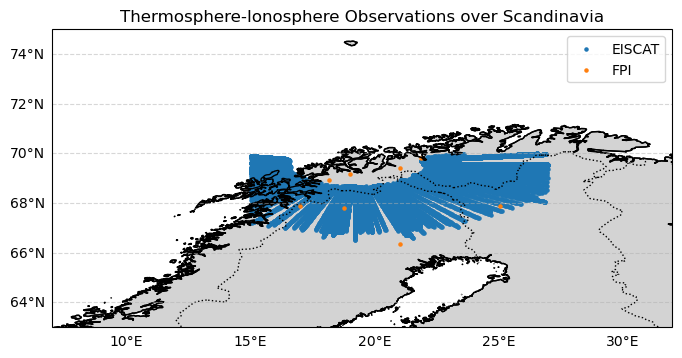

In [6]:
from src.load_data import plot_observation_locations_3D, plot_observation_locations_2D

plot_observation_locations_2D(dfs_to_plot=[eiscat_filtered, fpi_filtered], df_names=['EISCAT', 'FPI'])

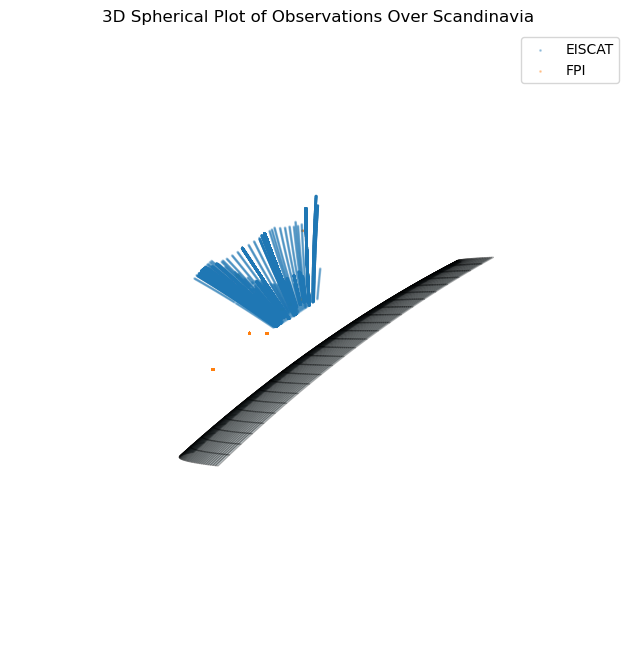

In [7]:
plot_observation_locations_3D(dfs_to_plot=[eiscat_filtered, fpi_filtered], df_names=['EISCAT', 'FPI'], azimuth=100, elevation=0)

## Convert to Cartesian Coordinates

In [8]:
import numpy as np
from scipy.spatial import Delaunay

# Earth radius in km
R = 6371  

def latlon_to_cartesian(lat, lon, alt):
    """Convert lat/lon/alt (degrees, km) to 3D Cartesian coordinates."""
    lat, lon = np.radians(lat), np.radians(lon)  # Convert to radians
    x = (R + alt) * np.cos(lat) * np.cos(lon)
    y = (R + alt) * np.cos(lat) * np.sin(lon)
    z = (R + alt) * np.sin(lat)
    return x, y, z

In [9]:
import pandas as pd
from tqdm import tqdm

# Enable tqdm for pandas apply
tqdm.pandas()

# Convert lat, lon, alt to Cartesian with tqdm progress bar
eiscat_filtered["x"], eiscat_filtered["y"], eiscat_filtered["z"] = zip(
    *eiscat_filtered.progress_apply(
        lambda row: latlon_to_cartesian(row["observation_latitude"], row["observation_longitude"], row["altitude"]), 
        axis=1
    )
)

100%|██████████| 2384630/2384630 [00:16<00:00, 142513.49it/s]


In [10]:
# Enable tqdm for pandas apply
tqdm.pandas()

# Convert lat, lon, alt to Cartesian with tqdm progress bar
fpi_filtered["x"], fpi_filtered["y"], fpi_filtered["z"] = zip(
    *fpi_filtered.progress_apply(
        lambda row: latlon_to_cartesian(row["observation_latitude"], row["observation_longitude"], row["altitude"]), 
        axis=1
    )
)

100%|██████████| 684824/684824 [00:04<00:00, 141386.79it/s]


In [11]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler

# Assuming shorter_df is already defined
# Filter the data as per your original code
shorter_df = fpi_filtered.copy()
shorter_df = shorter_df[shorter_df['unix_time'] >= 1600000000]
#shorter_df = shorter_df[shorter_df['altitude'] < 200]


In [45]:
shorter_df.observation_longitude.unique()

array([21.03    , 25.076951, 16.983049, 18.168373, 19.006524])

In [49]:
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# Assume you have a DataFrame shorter_df
# Example DataFrame:
# shorter_df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Extract the necessary columns
latitudes = shorter_df["observation_latitude"].values
longitudes = shorter_df["observation_longitude"].values
altitudes = shorter_df["altitude"].values
times = shorter_df["unix_time"].values
temperatures = shorter_df["temperature"].values

# Create the RBF interpolator in 4D (latitude, longitude, altitude, time)
rbf_interpolator = Rbf(latitudes, longitudes, altitudes, times, temperatures, function='multiquadric')

: 

In [ ]:
# Define a regular 4D grid for interpolation (adjust the resolution as needed)
lat_grid = np.linspace(latitudes.min(), latitudes.max(), 10)
lon_grid = np.linspace(longitudes.min(), longitudes.max(), 10)
alt_grid = np.linspace(altitudes.min(), altitudes.max(), 5)
time_grid = np.linspace(times.min(), times.max(), 10)

# Create 4D meshgrid of regular points
LAT, LON, ALT, TIME = np.meshgrid(lat_grid, lon_grid, alt_grid, time_grid, indexing='ij')

# Reshape the grid points for interpolation
grid_points = np.vstack([LAT.ravel(), LON.ravel(), ALT.ravel(), TIME.ravel()]).T

# Perform interpolation
temperature_grid = rbf_interpolator(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], grid_points[:, 3])

# Reshape the interpolated values back to the 4D grid shape
temperature_grid = temperature_grid.reshape(LAT.shape)

print("✅ RBF Interpolation completed!")


In [ ]:

# 🔹 Step 4: Create interpolator
interp = LinearNDInterpolator(tri, temperatures)

# 🔹 Step 5: Define Regular 4D Grid for Interpolation
lat_grid = np.linspace(latitudes.min(), latitudes.max(), 10)     # 10 points in latitude
lon_grid = np.linspace(longitudes.min(), longitudes.max(), 10)   # 10 points in longitude
alt_grid = np.linspace(altitudes.min(), altitudes.max(), 5)      # 5 altitude levels
time_grid = np.linspace(times.min(), times.max(), 10)            # 10 time points

# Create 4D Meshgrid
LAT, LON, ALT, TIME = np.meshgrid(lat_grid, lon_grid, alt_grid, time_grid, indexing='ij')

# 🔹 Step 6: Reshape Grid Points for Interpolation
grid_points = np.vstack([LAT.ravel(), LON.ravel(), ALT.ravel(), TIME.ravel()]).T  # Shape (M, 4)

# 🔹 Step 7: Interpolate temperature values
temperature_grid = interp(grid_points)

# Reshape to match grid dimensions
temperature_grid = temperature_grid.reshape(LAT.shape)

print("✅ Interpolated temperature grid shape:", temperature_grid.shape)


## Interpolation/Extrapolation

In [ ]:
from scipy.interpolate import NearestNDInterpolator
from scipy.interpolate import LinearNDInterpolator

# Create 4D Delaunay triangulation and interpolation function
interpolator = LinearNDInterpolator(points, values)
nearest_interpolator = NearestNDInterpolator(points, values)

def interpolate_or_extrapolate(new_points):
    interpolated_values = interpolator(new_points)
    
    # Replace NaN values (outside convex hull) with nearest neighbor extrapolation
    fixed_values = np.where(np.isnan(interpolated_values), nearest_interpolator(new_points), interpolated_values)
    
    return fixed_values

QhullError: QH6271 qhull topology error (qh_check_dupridge): wide merge (490501.9x wider) due to dupridge between f9142 and f9135 (vertex dist 6e+03), merge dist 1.1e+02, while processing p205012
- Allow error with option 'Q12'
- A bounding box for the input sites may alleviate this error.
QH6271 qhull topology error (qh_check_dupridge): wide merge (160.4x wider) due to dupridge between f17378 and f17376 (vertex dist 2.5e+04), merge dist 9.5, while processing p133022
- Allow error with option 'Q12'
- A bounding box for the input sites may alleviate this error.
QH6417 qhull precision error (qh_merge_twisted): twisted facet f19114 does not contain pinched vertices.  Too wide to merge into neighbor.  mindist -4.7e+03 maxdist  0 vertexdist 6.5e+02 maxpinched 0.0013 neighbor f22245 mindist -0.03 maxdist  0
ERRONEOUS FACET:
- f19114
    - flags: top upperDelaunay newfacet tested keepcentrum newmerge
    - merges: 338
    - normal:   -0.3519  -0.1359  -0.9261       -0       -0
    - offset:   6488.602
    - center: 2167.255706386738 799.8043772606471 6065.363321479322 1708925855.887417 677337554.8801198 
    - vertices: p159122(v751) p112738(v749) p114303(v745) p101056(v741) p267853(v739) p276316(v716) p250764(v715) p246575(v709) p295943(v699) p287125(v697) p193663(v691) p205388(v689) p202717(v687) p223916(v683) p202375(v679) p203764(v678) p201113(v663) p164143(v661) p155181(v654) p90621(v619) p120773(v608) p184970(v532) p182228(v531) p181199(v530) p189098(v528) p186457(v522) p164963(v520) p165190(v519) p163679(v518) p164541(v517) p162850(v516) p162174(v515) p167050(v514) p167850(v513) p169367(v512) p170389(v511) p157395(v510) p155479(v509) p158113(v508) p159072(v507) p107518(v496) p270257(v493) p260760(v492) p307210(v486) p239858(v475) p243061(v474) p249156(v473) p286487(v468) p299139(v463) p282854(v461) p204637(v456) p204047(v453) p211119(v452) p203223(v450) p199452(v449) p190164(v443) p187405(v441) p173662(v440) p160625(v436) p155190(v432) p98594(v415) p94159(v411) p173159(v354) p183594(v352) p184968(v351) p182224(v350) p180794(v349) p189088(v348) p186492(v346) p185577(v345) p164814(v344) p165857(v343) p164140(v342) p162848(v341) p166950(v340) p166630(v339) p168161(v338) p169969(v337) p156511(v336) p158797(v335) p107569(v324) p267846(v322) p251175(v318) p234664(v312) p239691(v310) p243670(v309) p282782(v302) p205012(v296) p201728(v294) p173684(v288) p225371(v287) p201285(v286) p155173(v283) p87890(v268) p125667(v260) p177404(v233) p179277(v232) p175432(v231) p172780(v230) p184086(v229) p181283(v228) p188314(v226) p185958(v225) p164974(v224) p163209(v223) p166644(v222) p169365(v221) p160659(v220) p161495(v219) p157660(v218) p106473(v214) p107798(v212) p255721(v207) p231754(v201) p242754(v200) p291523(v196) p201289(v189) p155099(v188) p97117(v179) p31396(v159) p72586(v157) p178240(v156) p173697(v155) p183093(v154) p187302(v153) p164799(v152) p167465(v151) p160662(v150) p155452(v149) p116607(v145) p249984(v141) p308692(v140) p224986(v138) p237916(v137) p204167(v129) p72304(v114) p175444(v112) p185308(v111) p166556(v110) p159750(v109) p100050(v107) p197397(v100) p225746(v99) p205758(v94) p144440(v89) p65287(v82) p180290(v79) p161499(v78) p144435(v77) p129527(v76) p272636(v75) p299140(v74) p204015(v70) p79450(v62) p141860(v61) p79446(v59) p170529(v57) p137303(v56) p249973(v53) p130848(v47) p155476(v43) p295946(v41) p189976(v38) p205784(v31) p81817(v30) p190073(v25) p309922(v24) p309921(v18) p155083(v16) p2(v13) p278245(v12) p155464(v9) p6(v3)
    - neighboring facets: f15174 f19505 f19386 f19392 f8746 f144 f94 f19924 f664 f3534 f1665 f20050 f20487 f8940 f2615 f19877 f7114 f19642 f19760 f15644 f15597 f19235 f19369 f15236 f19396 f15056 f12892 f688 f13168 f3536 f14407 f10435 f10583 f4792 f15069 f8618 f15125 f15619 f12884 f15094 f4804 f4813 f10613 f5691 f20269 f281 f19796 f13253 f19183 f19383 f19389 f10415 f19453 f12826 f19595 f13158 f15417 f8931 f11901 f8196 f17955 f19553 f13551 f13152 f18901 f20045 f8982 f13500 f14042 f13825 f14040 f19871 f21218 f21831 f18602 f15035 f15552 f19365 f8707 f19024 f10330 f13110 f12803 f15144 f19418 f19492 f15214 f18887 f12084 f12121 f12104 f19258 f20197 f19643 f19902 f19916 f9140 f13499 f9141 f13614 f20195 f13828 f20916 f14020 f14044 f1422 f6743 f19422 f15045 f18892 f19021 f19090 f19187 f19403 f19500 f19188 f19402 f19268 f20072 f19245 f19493 f19596 f19600 f20015 f19737 f19763 f20014 f20020 f20021 f20073 f20193 f20207 f13830 f20431 f20577 f20483 f20937 f21241 f21176 f21173 f21217 f21112 f20350 f14668 f21905 f22031 f22144 f17632 f22176 f22245
    - ridges:
     - r17633 tested simplicialtop
           vertices: p162174(v515) p162848(v341) p161499(v78) p155476(v43)
           between f19114 and f15174
     - r17668 tested
           vertices: p162850(v516) p162848(v341) p161499(v78) p155476(v43)
           between f15174 and f19114
     - r17667 tested
           vertices: p162850(v516) p163209(v223) p161499(v78) p155476(v43)
           between f19114 and f15174
     - r22673 tested simplicialbot
           vertices: p164143(v661) p166630(v339) p166556(v110) p155476(v43)
           between f19114 and f19505
     - r22852 tested simplicialtop simplicialbot
           vertices: p164143(v661) p162174(v515) p161499(v78) p155476(v43)
           between f19114 and f19386
     - r22853 tested simplicialtop simplicialbot
           vertices: p164143(v661) p162174(v515) p162848(v341) p155476(v43)
           between f19392 and f19114
     - r22737 tested simplicialtop
           vertices: p164143(v661) p162174(v515) p162848(v341) p161499(v78)
           between f19114 and f8746
     - r11488 tested
           vertices: p162848(v341) p163209(v223) p161499(v78) p155083(v16)
           between f8746 and f19114
     - r22641 tested
           vertices: p164143(v661) p164963(v520) p164814(v344) p164974(v224)
           between f8746 and f19114
     - r11356 tested
           vertices: p158797(v335) p157660(v218) p159750(v109) p155083(v16)
           between f19114 and f8746
     - r4855 tested
           vertices: p167465(v151) p166556(v110) p170529(v57) p155083(v16)
           between f19114 and f8746
     - r9297 tested
           vertices: p173684(v288) p169365(v221) p167465(v151) p155083(v16)
           between f8746 and f19114
     - r7144 tested
           vertices: p160659(v220) p160662(v150) p159750(v109) p155083(v16)
           between f8746 and f19114
     - r7156 tested
           vertices: p169365(v221) p167465(v151) p170529(v57) p155083(v16)
           between f19114 and f8746
     - r7168 tested
           vertices: p166644(v222) p167465(v151) p166556(v110) p155083(v16)
           between f8746 and f19114
     - r9288 tested
           vertices: p173684(v288) p166644(v222) p167465(v151) p155083(v16)
           between f19114 and f8746
     - r8831 tested
           vertices: p155173(v283) p155099(v188) p155452(v149) p155083(v16)
           between f19114 and f8746
     - r11507 tested
           vertices: p164140(v342) p163209(v223) p164799(v152) p155083(v16)
           between f19114 and f8746
     - r9282 tested
           vertices: p173684(v288) p166644(v222) p166556(v110) p155083(v16)
           between f8746 and f19114
     - r9294 tested
           vertices: p173684(v288) p169365(v221) p170529(v57) p155083(v16)
           between f19114 and f8746
     - r11375 tested
           vertices: p156511(v336) p157660(v218) p155452(v149) p155083(v16)
           between f8746 and f19114
     - r17387 tested
           vertices: p159072(v507) p158797(v335) p159750(v109) p155083(v16)
           between f19114 and f8746
     - r17444 tested
           vertices: p155479(v509) p156511(v336) p155452(v149) p155083(v16)
           between f8746 and f19114
     - r11394 tested
           vertices: p169969(v337) p173684(v288) p169365(v221) p170529(v57)
           between f19114 and f8746
     - r11413 tested
           vertices: p168161(v338) p173684(v288) p169365(v221) p167465(v151)
           between f8746 and f19114
     - r11438 tested
           vertices: p166630(v339) p173684(v288) p166644(v222) p166556(v110)
           between f8746 and f19114
     - r11457 tested
           vertices: p166950(v340) p173684(v288) p166644(v222) p167465(v151)
           between f19114 and f8746
     - r22675 tested simplicialbot
           vertices: p164143(v661) p166630(v339) p173684(v288) p166556(v110)
           between f19114 and f8746
     - r11526 tested
           vertices: p165857(v343) p173684(v288) p164974(v224) p166556(v110)
           between f19114 and f8746
     - r11544 tested
           vertices: p164814(v344) p173684(v288) p164974(v224) p164799(v152)
           between f8746 and f19114
     - r11840 tested
           vertices: p173159(v354) p173684(v288) p172780(v230) p173697(v155)
           between f19114 and f8746
     - r14289 tested
           vertices: p155190(v432) p155173(v283) p155452(v149) p155083(v16)
           between f19114 and f8746
     - r14542 tested
           vertices: p173662(v440) p164814(v344) p173684(v288) p164799(v152)
           between f19114 and f8746
     - r14540 tested
           vertices: p173662(v440) p173684(v288) p164799(v152) p155083(v16)
           between f8746 and f19114
     - r22599 tested
           vertices: p164143(v661) p164140(v342) p164799(v152) p155083(v16)
           between f19114 and f8746
     - r14539 tested
           vertices: p173662(v440) p164814(v344) p173684(v288) p164974(v224)
           between f8746 and f19114
     - r17414 tested
           vertices: p158113(v508) p158797(v335) p157660(v218) p155083(v16)
           between f8746 and f19114
     - r17486 tested
           vertices: p157395(v510) p156511(v336) p157660(v218) p155083(v16)
           between f19114 and f8746
     - r22461 tested
           vertices: p155181(v654) p155190(v432) p155173(v283) p155083(v16)
           between f8746 and f19114
     - r22604 tested
           vertices: p164143(v661) p173662(v440) p164814(v344) p164799(v152)
           between f8746 and f19114
     - r22602 tested
           vertices: p164143(v661) p173662(v440) p164799(v152) p155083(v16)
           between f8746 and f19114
     - r22626 tested
           vertices: p164143(v661) p164541(v517) p164140(v342) p164799(v152)
           between f8746 and f19114
     - r22596 tested
           vertices: p164143(v661) p173662(v440) p164814(v344) p164974(v224)
           between f19114 and f8746
     - r22650 tested
           vertices: p164143(v661) p163679(v518) p164140(v342) p163209(v223)
           between f19114 and f8746
     - r22622 tested
           vertices: p164143(v661) p164140(v342) p163209(v223) p155083(v16)
           between f8746 and f19114
     - r22678 tested simplicialbot
           vertices: p164143(v661) p165190(v519) p165857(v343) p164974(v224)
           between f19114 and f8746
     - r22640 tested simplicialtop
           vertices: p164143(v661) p173662(v440) p173684(v288) p164974(v224)
           between f8746 and f19114
     - r22669 tested simplicialbot
           vertices: p164143(v661) p165857(v343) p173684(v288) p164974(v224)
           between f19114 and f8746
     - r22680 tested simplicialtop
           vertices: p164143(v661) p165857(v343) p173684(v288) p166556(v110)
           between f8746 and f19114
     - r22694 tested
           vertices: p164143(v661) p162850(v516) p162848(v341) p163209(v223)
           between f8746 and f19114
     - r22646 tested
           vertices: p164143(v661) p162848(v341) p163209(v223) p155083(v16)
           between f19114 and f8746
     - r22705 tested simplicialtop
           vertices: p164143(v661) p167050(v514) p166950(v340) p167465(v151)
           between f8746 and f19114
     - r22708 tested simplicialbot
           vertices: p164143(v661) p167850(v513) p168161(v338) p167465(v151)
           between f19114 and f8746
     - r22710 tested simplicialbot
           vertices: p164143(v661) p166950(v340) p173684(v288) p166644(v222)
           between f19114 and f8746
     - r22711 tested simplicialtop
           vertices: p164143(v661) p166950(v340) p173684(v288) p167465(v151)
           between f8746 and f19114
     - r22713 tested simplicialbot
           vertices: p164143(v661) p168161(v338) p173684(v288) p167465(v151)
           between f19114 and f8746
     - r22715 tested simplicialtop
           vertices: p164143(v661) p166630(v339) p173684(v288) p166644(v222)
           between f8746 and f19114
     - r22690 tested
           vertices: p164143(v661) p162848(v341) p161499(v78) p155083(v16)
           between f8746 and f19114
     - r22733 tested
           vertices: p164143(v661) p161495(v219) p161499(v78) p155083(v16)
           between f19114 and f8746
     - r22743 tested
           vertices: p164143(v661) p161495(v219) p160662(v150) p155083(v16)
           between f8746 and f19114
     - r22750 tested
           vertices: p164143(v661) p160659(v220) p160662(v150) p155083(v16)
           between f19114 and f8746
     - r22755 tested simplicialtop
           vertices: p164143(v661) p160659(v220) p159750(v109) p155083(v16)
           between f8746 and f19114
     - r22760 tested
           vertices: p164143(v661) p159072(v507) p159750(v109) p155083(v16)
           between f19114 and f8746
     - r22768 tested
           vertices: p164143(v661) p159072(v507) p158797(v335) p155083(v16)
           between f8746 and f19114
     - r22773 tested
           vertices: p164143(v661) p158113(v508) p158797(v335) p155083(v16)
           between f19114 and f8746
     - r22764 tested
           vertices: p164143(v661) p160625(v436) p160659(v220) p159750(v109)
           between f19114 and f8746
     - r87 tested
           vertices: p155083(v16) p2(v13) p278245(v12) p6(v3)
           between f19114 and f144
     - r127 tested
           vertices: p309921(v18) p2(v13) p278245(v12) p6(v3)
           between f144 and f19114
     - r131 tested
           vertices: p309921(v18) p155083(v16) p2(v13) p278245(v12)
           between f19114 and f144
     - r315 tested
           vertices: p309922(v24) p309921(v18) p278245(v12) p6(v3)
           between f144 and f19114
     - r359 tested
           vertices: p190073(v25) p309921(v18) p155083(v16) p2(v13)
           between f19114 and f144
     - r349 tested
           vertices: p190073(v25) p309921(v18) p155083(v16) p278245(v12)
           between f144 and f19114
     - r538 tested
           vertices: p81817(v30) p190073(v25) p155083(v16) p2(v13)
           between f19114 and f144
     - r535 tested
           vertices: p81817(v30) p155083(v16) p2(v13) p6(v3)
           between f144 and f19114
     - r1049 tested
           vertices: p130848(v47) p189976(v38) p81817(v30) p155083(v16)
           between f144 and f19114
     - r4482 tested
           vertices: p308692(v140) p272636(v75) p295946(v41) p309921(v18)
           between f144 and f19114
     - r754 tested
           vertices: p189976(v38) p81817(v30) p190073(v25) p155083(v16)
           between f19114 and f144
     - r763 tested
           vertices: p189976(v38) p81817(v30) p190073(v25) p2(v13)
           between f144 and f19114
     - r1952 tested
           vertices: p204015(v70) p249973(v53) p190073(v25) p278245(v12)
           between f144 and f19114
     - r903 tested
           vertices: p295946(v41) p309922(v24) p309921(v18) p278245(v12)
           between f144 and f19114
     - r1046 tested
           vertices: p130848(v47) p189976(v38) p81817(v30) p2(v13)
           between f19114 and f144
     - r3328 tested
           vertices: p159750(v109) p144440(v89) p161499(v78) p155083(v16)
           between f19114 and f144
     - r1320 tested
           vertices: p249973(v53) p190073(v25) p309921(v18) p278245(v12)
           between f19114 and f144
     - r1396 tested
           vertices: p137303(v56) p130848(v47) p81817(v30) p155083(v16)
           between f144 and f19114
     - r4959 tested
           vertices: p72586(v157) p72304(v114) p65287(v82) p6(v3)
           between f144 and f19114
     - r1420 tested
           vertices: p170529(v57) p130848(v47) p189976(v38) p155083(v16)
           between f19114 and f144
     - r1513 tested simplicialbot
           vertices: p79446(v59) p130848(v47) p81817(v30) p2(v13)
           between f19114 and f144
     - r2133 tested
           vertices: p129527(v76) p79446(v59) p130848(v47) p81817(v30)
           between f19114 and f144
     - r1604 tested
           vertices: p141860(v61) p137303(v56) p130848(v47) p155083(v16)
           between f19114 and f144
     - r1606 tested
           vertices: p141860(v61) p170529(v57) p130848(v47) p155083(v16)
           between f144 and f19114
     - r2177 tested
           vertices: p161499(v78) p141860(v61) p170529(v57) p155083(v16)
           between f19114 and f144
     - r9314 tested
           vertices: p173684(v288) p175432(v231) p173697(v155) p155083(v16)
           between f144 and f19114
     - r2063 tested
           vertices: p299140(v74) p295946(v41) p309922(v24) p309921(v18)
           between f144 and f19114
     - r2075 tested
           vertices: p272636(v75) p249973(v53) p309921(v18) p278245(v12)
           between f19114 and f144
     - r2083 tested
           vertices: p272636(v75) p295946(v41) p309921(v18) p278245(v12)
           between f144 and f19114
     - r15190 tested
           vertices: p203223(v450) p201728(v294) p201285(v286) p204015(v70)
           between f19114 and f144
     - r2118 tested
           vertices: p129527(v76) p137303(v56) p130848(v47) p81817(v30)
           between f144 and f19114
     - r3277 tested
           vertices: p100050(v107) p129527(v76) p79446(v59) p130848(v47)
           between f19114 and f144
     - r2156 tested
           vertices: p144435(v77) p141860(v61) p137303(v56) p155083(v16)
           between f144 and f19114
     - r4804 tested
           vertices: p155452(v149) p159750(v109) p144440(v89) p155083(v16)
           between f144 and f19114
     - r2216 tested
           vertices: p180290(v79) p170529(v57) p189976(v38) p155083(v16)
           between f19114 and f144
     - r2302 tested simplicialtop
           vertices: p65287(v82) p81817(v30) p2(v13) p6(v3)
           between f144 and f19114
     - r2304 tested simplicialbot
           vertices: p65287(v82) p79446(v59) p81817(v30) p2(v13)
           between f19114 and f144
     - r2308 tested
           vertices: p65287(v82) p79450(v62) p79446(v59) p81817(v30)
           between f144 and f19114
     - r2307 tested
           vertices: p65287(v82) p79450(v62) p81817(v30) p6(v3)
           between f144 and f19114
     - r2644 tested
           vertices: p144440(v89) p161499(v78) p141860(v61) p155083(v16)
           between f144 and f19114
     - r2646 tested
           vertices: p144440(v89) p144435(v77) p141860(v61) p155083(v16)
           between f19114 and f144
     - r3073 tested
           vertices: p225746(v99) p204015(v70) p249973(v53) p278245(v12)
           between f19114 and f144
     - r3100 tested
           vertices: p197397(v100) p204015(v70) p190073(v25) p278245(v12)
           between f144 and f19114
     - r3274 tested
           vertices: p100050(v107) p129527(v76) p79446(v59) p81817(v30)
           between f144 and f19114
     - r3362 tested
           vertices: p166556(v110) p161499(v78) p170529(v57) p155083(v16)
           between f19114 and f144
     - r4881 tested
           vertices: p187302(v153) p185308(v111) p189976(v38) p155083(v16)
           between f19114 and f144
     - r3373 tested
           vertices: p185308(v111) p180290(v79) p189976(v38) p155083(v16)
           between f19114 and f144
     - r3386 tested
           vertices: p175444(v112) p180290(v79) p170529(v57) p155083(v16)
           between f144 and f19114
     - r3470 tested
           vertices: p72304(v114) p65287(v82) p79450(v62) p79446(v59)
           between f144 and f19114
     - r3458 tested
           vertices: p72304(v114) p65287(v82) p79450(v62) p6(v3)
           between f19114 and f144
     - r6046 tested
           vertices: p201289(v189) p189976(v38) p190073(v25) p155083(v16)
           between f19114 and f144
     - r9103 tested
           vertices: p225371(v287) p201289(v189) p237916(v137) p278245(v12)
           between f19114 and f144
     - r4396 tested
           vertices: p237916(v137) p225746(v99) p249973(v53) p278245(v12)
           between f19114 and f144
     - r4419 tested
           vertices: p224986(v138) p225746(v99) p204015(v70) p278245(v12)
           between f144 and f19114
     - r6012 tested
           vertices: p201289(v189) p197397(v100) p190073(v25) p278245(v12)
           between f144 and f19114
     - r6273 tested
           vertices: p291523(v196) p308692(v140) p299140(v74) p295946(v41)
           between f19114 and f144
     - r4485 tested
           vertices: p308692(v140) p299140(v74) p295946(v41) p309921(v18)
           between f19114 and f144
     - r4678 tested
           vertices: p116607(v145) p100050(v107) p129527(v76) p130848(v47)
           between f144 and f19114
     - r4843 tested
           vertices: p160662(v150) p159750(v109) p161499(v78) p155083(v16)
           between f19114 and f144
     - r4867 tested
           vertices: p164799(v152) p166556(v110) p161499(v78) p155083(v16)
           between f144 and f19114
     - r9285 tested
           vertices: p173684(v288) p164974(v224) p164799(v152) p155083(v16)
           between f144 and f19114
     - r9172 tested
           vertices: p173684(v288) p201289(v189) p189976(v38) p155083(v16)
           between f144 and f19114
     - r4895 tested
           vertices: p183093(v154) p185308(v111) p180290(v79) p155083(v16)
           between f144 and f19114
     - r4907 tested
           vertices: p173697(v155) p175444(v112) p170529(v57) p155083(v16)
           between f144 and f19114
     - r4919 tested
           vertices: p178240(v156) p175444(v112) p180290(v79) p155083(v16)
           between f19114 and f144
     - r4975 tested
           vertices: p72586(v157) p72304(v114) p79450(v62) p79446(v59)
           between f144 and f19114
     - r4953 tested
           vertices: p72586(v157) p72304(v114) p79450(v62) p6(v3)
           between f19114 and f144
     - r5052 tested
           vertices: p31396(v159) p65287(v82) p2(v13) p6(v3)
           between f144 and f19114
     - r5987 tested
           vertices: p155099(v188) p155452(v149) p144440(v89) p155083(v16)
           between f144 and f19114
     - r6009 tested
           vertices: p201289(v189) p224986(v138) p204015(v70) p278245(v12)
           between f144 and f19114
     - r6006 tested
           vertices: p201289(v189) p197397(v100) p204015(v70) p278245(v12)
           between f19114 and f144
     - r6032 tested
           vertices: p201289(v189) p224986(v138) p225746(v99) p278245(v12)
           between f19114 and f144
     - r6027 tested
           vertices: p201289(v189) p190073(v25) p155083(v16) p278245(v12)
           between f144 and f19114
     - r6042 tested
           vertices: p201289(v189) p237916(v137) p225746(v99) p278245(v12)
           between f144 and f19114
     - r9176 tested
           vertices: p173684(v288) p187302(v153) p189976(v38) p155083(v16)
           between f19114 and f144
     - r6267 tested
           vertices: p291523(v196) p308692(v140) p272636(v75) p295946(v41)
           between f144 and f19114
     - r6270 tested
           vertices: p291523(v196) p272636(v75) p295946(v41) p278245(v12)
           between f19114 and f144
     - r15303 tested
           vertices: p204047(v453) p211119(v452) p201728(v294) p225371(v287)
           between f144 and f19114
     - r6530 tested simplicialbot
           vertices: p242754(v200) p237916(v137) p249973(v53) p278245(v12)
           between f19114 and f144
     - r6557 tested
           vertices: p231754(v201) p201289(v189) p237916(v137) p225746(v99)
           between f144 and f19114
     - r9084 tested
           vertices: p225371(v287) p201289(v189) p224986(v138) p204015(v70)
           between f144 and f19114
     - r6714 tested
           vertices: p255721(v207) p272636(v75) p249973(v53) p278245(v12)
           between f144 and f19114
     - r6959 tested
           vertices: p106473(v214) p116607(v145) p100050(v107) p129527(v76)
           between f144 and f19114
     - r6944 tested
           vertices: p106473(v214) p100050(v107) p129527(v76) p81817(v30)
           between f19114 and f144
     - r6966 tested
           vertices: p106473(v214) p107798(v212) p116607(v145) p100050(v107)
           between f19114 and f144
     - r7120 tested
           vertices: p157660(v218) p155452(v149) p159750(v109) p155083(v16)
           between f19114 and f144
     - r10876 tested
           vertices: p267846(v322) p255721(v207) p272636(v75) p278245(v12)
           between f19114 and f144
     - r7132 tested
           vertices: p161495(v219) p160662(v150) p161499(v78) p155083(v16)
           between f19114 and f144
     - r9292 tested
           vertices: p173684(v288) p172780(v230) p173697(v155) p155083(v16)
           between f19114 and f144
     - r7180 tested
           vertices: p163209(v223) p164799(v152) p161499(v78) p155083(v16)
           between f144 and f19114
     - r7192 tested
           vertices: p164974(v224) p164799(v152) p166556(v110) p155083(v16)
           between f19114 and f144
     - r7275 tested
           vertices: p181283(v228) p183093(v154) p180290(v79) p155083(v16)
           between f144 and f19114
     - r7287 tested
           vertices: p184086(v229) p183093(v154) p185308(v111) p155083(v16)
           between f19114 and f144
     - r7299 tested
           vertices: p172780(v230) p173697(v155) p170529(v57) p155083(v16)
           between f144 and f19114
     - r7311 tested
           vertices: p175432(v231) p173697(v155) p175444(v112) p155083(v16)
           between f19114 and f144
     - r7323 tested
           vertices: p179277(v232) p178240(v156) p180290(v79) p155083(v16)
           between f19114 and f144
     - r7342 tested
           vertices: p177404(v233) p178240(v156) p175444(v112) p155083(v16)
           between f144 and f19114
     - r8243 tested
           vertices: p125667(v260) p116607(v145) p129527(v76) p130848(v47)
           between f144 and f19114
     - r8465 tested simplicialtop
           vertices: p87890(v268) p100050(v107) p79446(v59) p81817(v30)
           between f144 and f19114
     - r9064 tested
           vertices: p201285(v286) p201289(v189) p197397(v100) p204015(v70)
           between f19114 and f144
     - r9078 tested
           vertices: p225371(v287) p201289(v189) p224986(v138) p225746(v99)
           between f19114 and f144
     - r9081 tested
           vertices: p225371(v287) p231754(v201) p201289(v189) p225746(v99)
           between f19114 and f144
     - r9087 tested
           vertices: p225371(v287) p231754(v201) p201289(v189) p237916(v137)
           between f144 and f19114
     - r9116 tested
           vertices: p225371(v287) p242754(v200) p237916(v137) p278245(v12)
           between f144 and f19114
     - r9121 tested
           vertices: p225371(v287) p242754(v200) p249973(v53) p278245(v12)
           between f19114 and f144
     - r9180 tested
           vertices: p173684(v288) p187302(v153) p185308(v111) p155083(v16)
           between f144 and f19114
     - r9192 tested
           vertices: p173684(v288) p184086(v229) p185308(v111) p155083(v16)
           between f19114 and f144
     - r9231 tested
           vertices: p173684(v288) p184086(v229) p183093(v154) p155083(v16)
           between f144 and f19114
     - r9243 tested
           vertices: p173684(v288) p181283(v228) p183093(v154) p155083(v16)
           between f19114 and f144
     - r9250 tested
           vertices: p173684(v288) p181283(v228) p180290(v79) p155083(v16)
           between f144 and f19114
     - r9258 tested
           vertices: p173684(v288) p179277(v232) p180290(v79) p155083(v16)
           between f19114 and f144
     - r9266 tested
           vertices: p173684(v288) p179277(v232) p178240(v156) p155083(v16)
           between f144 and f19114
     - r9276 tested
           vertices: p173684(v288) p177404(v233) p178240(v156) p155083(v16)
           between f19114 and f144
     - r9278 tested
           vertices: p173684(v288) p164974(v224) p166556(v110) p155083(v16)
           between f19114 and f144
     - r9271 tested
           vertices: p173684(v288) p172780(v230) p170529(v57) p155083(v16)
           between f144 and f19114
     - r9302 tested
           vertices: p173684(v288) p177404(v233) p175444(v112) p155083(v16)
           between f144 and f19114
     - r9327 tested
           vertices: p173684(v288) p175432(v231) p175444(v112) p155083(v16)
           between f19114 and f144
     - r9184 tested
           vertices: p173684(v288) p188314(v226) p187302(v153) p189976(v38)
           between f144 and f19114
     - r9196 tested
           vertices: p173684(v288) p185958(v225) p187302(v153) p185308(v111)
           between f19114 and f144
     - r9893 tested
           vertices: p201728(v294) p225371(v287) p201289(v189) p204015(v70)
           between f19114 and f144
     - r9896 tested
           vertices: p201728(v294) p201285(v286) p201289(v189) p204015(v70)
           between f144 and f19114
     - r15168 tested
           vertices: p199452(v449) p201285(v286) p201289(v189) p197397(v100)
           between f19114 and f144
     - r10168 tested
           vertices: p282782(v302) p291523(v196) p272636(v75) p278245(v12)
           between f144 and f19114
     - r10401 tested
           vertices: p243670(v309) p225371(v287) p242754(v200) p249973(v53)
           between f19114 and f144
     - r10430 tested
           vertices: p239691(v310) p225371(v287) p242754(v200) p237916(v137)
           between f144 and f19114
     - r10511 tested
           vertices: p234664(v312) p225371(v287) p231754(v201) p237916(v137)
           between f19114 and f144
     - r16855 tested
           vertices: p260760(v492) p267846(v322) p255721(v207) p278245(v12)
           between f144 and f19114
     - r13750 tested
           vertices: p98594(v415) p106473(v214) p107798(v212) p100050(v107)
           between f144 and f19114
     - r13789 tested simplicialbot
           vertices: p98594(v415) p87890(v268) p100050(v107) p81817(v30)
           between f19114 and f144
     - r13745 tested simplicialtop
           vertices: p98594(v415) p106473(v214) p100050(v107) p81817(v30)
           between f144 and f19114
     - r13772 tested
           vertices: p98594(v415) p107569(v324) p107798(v212) p100050(v107)
           between f19114 and f144
     - r13793 tested
           vertices: p98594(v415) p87890(v268) p97117(v179) p100050(v107)
           between f19114 and f144
     - r13776 tested simplicialtop
           vertices: p98594(v415) p94159(v411) p87890(v268) p97117(v179)
           between f144 and f19114
     - r14699 tested
           vertices: p187405(v441) p173684(v288) p201289(v189) p189976(v38)
           between f144 and f19114
     - r14728 tested
           vertices: p187405(v441) p201289(v189) p189976(v38) p190073(v25)
           between f19114 and f144
     - r22930 tested
           vertices: p201113(v663) p190164(v443) p197397(v100) p190073(v25)
           between f19114 and f144
     - r23567 tested
           vertices: p203764(v678) p204047(v453) p203223(v450) p204015(v70)
           between f19114 and f144
     - r15271 tested
           vertices: p211119(v452) p201728(v294) p225371(v287) p204015(v70)
           between f144 and f19114
     - r15274 tested
           vertices: p211119(v452) p225371(v287) p224986(v138) p204015(v70)
           between f144 and f19114
     - r15300 tested
           vertices: p204047(v453) p211119(v452) p201728(v294) p204015(v70)
           between f19114 and f144
     - r15320 tested
           vertices: p204047(v453) p203223(v450) p201728(v294) p204015(v70)
           between f144 and f19114
     - r15679 tested
           vertices: p299139(v463) p291523(v196) p308692(v140) p299140(v74)
           between f19114 and f144
     - r15682 tested
           vertices: p299139(v463) p291523(v196) p299140(v74) p295946(v41)
           between f19114 and f144
     - r15841 tested
           vertices: p286487(v468) p282854(v461) p282782(v302) p291523(v196)
           between f144 and f19114
     - r15839 tested
           vertices: p286487(v468) p282782(v302) p291523(v196) p278245(v12)
           between f19114 and f144
     - r15825 tested
           vertices: p286487(v468) p291523(v196) p295946(v41) p278245(v12)
           between f19114 and f144
     - r24865 tested simplicialtop
           vertices: p246575(v709) p243670(v309) p225371(v287) p249973(v53)
           between f144 and f19114
     - r16666 tested simplicialtop
           vertices: p307210(v486) p308692(v140) p299140(v74) p309921(v18)
           between f144 and f19114
     - r16647 tested simplicialbot
           vertices: p307210(v486) p299139(v463) p308692(v140) p299140(v74)
           between f19114 and f144
     - r16665 tested simplicialtop
           vertices: p307210(v486) p299140(v74) p309922(v24) p309921(v18)
           between f144 and f19114
     - r22915 tested
           vertices: p201113(v663) p187405(v441) p201289(v189) p190073(v25)
           between f144 and f19114
     - r22929 tested
           vertices: p201113(v663) p201289(v189) p197397(v100) p190073(v25)
           between f144 and f19114
     - r22951 tested
           vertices: p201113(v663) p199452(v449) p201285(v286) p201289(v189)
           between f19114 and f144
     - r22941 tested
           vertices: p201113(v663) p199452(v449) p201289(v189) p197397(v100)
           between f19114 and f144
     - r24084 tested
           vertices: p193663(v691) p201113(v663) p190164(v443) p197397(v100)
           between f19114 and f144
     - r23599 tested
           vertices: p202375(v679) p203223(v450) p201728(v294) p201285(v286)
           between f19114 and f144
     - r23879 tested
           vertices: p202717(v687) p203764(v678) p204047(v453) p203223(v450)
           between f19114 and f144
     - r23769 tested
           vertices: p223916(v683) p211119(v452) p225371(v287) p224986(v138)
           between f144 and f19114
     - r23873 tested
           vertices: p202717(v687) p204047(v453) p203223(v450) p201728(v294)
           between f144 and f19114
     - r23876 tested
           vertices: p202717(v687) p202375(v679) p203223(v450) p201728(v294)
           between f19114 and f144
     - r24317 tested
           vertices: p287125(v697) p286487(v468) p282854(v461) p291523(v196)
           between f19114 and f144
     - r24392 tested
           vertices: p295943(v699) p299139(v463) p291523(v196) p295946(v41)
           between f144 and f19114
     - r24845 tested simplicialtop
           vertices: p246575(v709) p249156(v473) p243670(v309) p249973(v53)
           between f144 and f19114
     - r25317 tested simplicialbot
           vertices: p276316(v716) p246575(v709) p225371(v287) p249973(v53)
           between f144 and f19114
     - r25318 tested
           vertices: p276316(v716) p246575(v709) p249156(v473) p249973(v53)
           between f19114 and f144
     - r25319 tested simplicialbot
           vertices: p276316(v716) p255721(v207) p249973(v53) p278245(v12)
           between f144 and f19114
     - r25322 tested simplicialtop
           vertices: p276316(v716) p225371(v287) p249973(v53) p278245(v12)
           between f19114 and f144
     - r25373 tested simplicialtop
           vertices: p276316(v716) p260760(v492) p267846(v322) p278245(v12)
           between f19114 and f144
     - r25309 tested simplicialtop simplicialbot
           vertices: p276316(v716) p260760(v492) p255721(v207) p278245(v12)
           between f144 and f19114
     - r25367 tested simplicialbot
           vertices: p276316(v716) p267846(v322) p272636(v75) p278245(v12)
           between f19114 and f144
     - r25405 tested
           vertices: p276316(v716) p270257(v493) p267846(v322) p272636(v75)
           between f144 and f19114
     - r25320 tested
           vertices: p276316(v716) p255721(v207) p249984(v141) p249973(v53)
           between f144 and f19114
     - r25313 tested
           vertices: p276316(v716) p250764(v715) p255721(v207) p249984(v141)
           between f19114 and f144
     - r25314 tested
           vertices: p276316(v716) p250764(v715) p251175(v318) p255721(v207)
           between f19114 and f144
     - r26571 tested simplicialbot
           vertices: p112738(v749) p106473(v214) p107798(v212) p116607(v145)
           between f19114 and f144
     - r26574 tested simplicialtop
           vertices: p112738(v749) p125667(v260) p116607(v145) p129527(v76)
           between f144 and f19114
     - r26576 tested simplicialbot
           vertices: p112738(v749) p106473(v214) p116607(v145) p129527(v76)
           between f19114 and f144
     - r26638 tested
           vertices: p112738(v749) p114303(v745) p107798(v212) p116607(v145)
           between f144 and f19114
     - r26614 tested
           vertices: p112738(v749) p120773(v608) p125667(v260) p116607(v145)
           between f19114 and f144
     - r77 tested
           vertices: p155083(v16) p278245(v12) p155464(v9) p6(v3)
           between f19114 and f94
     - r1675 tested
           vertices: p79450(v62) p81817(v30) p155464(v9) p6(v3)
           between f19114 and f94
     - r339 tested
           vertices: p309922(v24) p278245(v12) p155464(v9) p6(v3)
           between f94 and f19114
     - r544 tested
           vertices: p81817(v30) p155083(v16) p155464(v9) p6(v3)
           between f19114 and f94
     - r561 tested
           vertices: p205784(v31) p309922(v24) p278245(v12) p155464(v9)
           between f94 and f19114
     - r564 tested
           vertices: p205784(v31) p309922(v24) p155464(v9) p6(v3)
           between f94 and f19114
     - r591 tested
           vertices: p205784(v31) p155083(v16) p278245(v12) p155464(v9)
           between f19114 and f94
     - r905 tested
           vertices: p295946(v41) p205784(v31) p309922(v24) p278245(v12)
           between f94 and f19114
     - r946 tested
           vertices: p155476(v43) p205784(v31) p155083(v16) p155464(v9)
           between f94 and f19114
     - r1402 tested
           vertices: p137303(v56) p81817(v30) p155083(v16) p155464(v9)
           between f19114 and f94
     - r6023 tested
           vertices: p201289(v189) p204167(v129) p155083(v16) p278245(v12)
           between f19114 and f94
     - r2068 tested
           vertices: p299140(v74) p295946(v41) p205784(v31) p309922(v24)
           between f94 and f19114
     - r2122 tested
           vertices: p129527(v76) p137303(v56) p81817(v30) p155464(v9)
           between f94 and f19114
     - r2160 tested
           vertices: p144435(v77) p137303(v56) p155083(v16) p155464(v9)
           between f19114 and f94
     - r4032 tested
           vertices: p204167(v129) p205784(v31) p155083(v16) p278245(v12)
           between f19114 and f94
     - r9093 tested
           vertices: p225371(v287) p201289(v189) p205784(v31) p278245(v12)
           between f94 and f19114
     - r4040 tested
           vertices: p204167(v129) p155476(v43) p205784(v31) p155083(v16)
           between f94 and f19114
     - r4965 tested
           vertices: p72586(v157) p79450(v62) p155464(v9) p6(v3)
           between f19114 and f94
     - r6020 tested simplicialtop
           vertices: p201289(v189) p204167(v129) p205784(v31) p278245(v12)
           between f94 and f19114
     - r6000 tested
           vertices: p201289(v189) p204167(v129) p205758(v94) p205784(v31)
           between f94 and f19114
     - r6073 tested
           vertices: p201289(v189) p204167(v129) p155476(v43) p155083(v16)
           between f19114 and f94
     - r6951 tested
           vertices: p106473(v214) p129527(v76) p81817(v30) p155464(v9)
           between f94 and f19114
     - r14665 tested
           vertices: p187405(v441) p173684(v288) p204167(v129) p155476(v43)
           between f19114 and f94
     - r14551 tested
           vertices: p173662(v440) p173684(v288) p155476(v43) p155083(v16)
           between f19114 and f94
     - r9901 tested simplicialtop
           vertices: p201728(v294) p201289(v189) p204167(v129) p205758(v94)
           between f94 and f19114
     - r9166 tested
           vertices: p173684(v288) p201289(v189) p204167(v129) p155476(v43)
           between f19114 and f94
     - r9162 tested
           vertices: p173684(v288) p201289(v189) p155476(v43) p155083(v16)
           between f19114 and f94
     - r9899 tested simplicialtop
           vertices: p201728(v294) p201289(v189) p205758(v94) p205784(v31)
           between f94 and f19114
     - r9892 tested
           vertices: p201728(v294) p225371(v287) p201289(v189) p205784(v31)
           between f94 and f19114
     - r9996 tested
           vertices: p205012(v296) p201728(v294) p204167(v129) p205758(v94)
           between f94 and f19114
     - r16670 tested
           vertices: p307210(v486) p299140(v74) p205784(v31) p309922(v24)
           between f94 and f19114
     - r13752 tested
           vertices: p98594(v415) p106473(v214) p81817(v30) p155464(v9)
           between f94 and f19114
     - r14700 tested
           vertices: p187405(v441) p173684(v288) p201289(v189) p204167(v129)
           between f19114 and f94
     - r15314 tested
           vertices: p204047(v453) p205012(v296) p201728(v294) p205784(v31)
           between f19114 and f94
     - r15309 tested
           vertices: p204047(v453) p205012(v296) p201728(v294) p204167(v129)
           between f94 and f19114
     - r15301 tested
           vertices: p204047(v453) p201728(v294) p225371(v287) p205784(v31)
           between f19114 and f94
     - r15312 tested
           vertices: p204047(v453) p205012(v296) p205758(v94) p205784(v31)
           between f94 and f19114
     - r15464 tested
           vertices: p204637(v456) p204047(v453) p205012(v296) p204167(v129)
           between f19114 and f94
     - r15831 tested
           vertices: p286487(v468) p295946(v41) p205784(v31) p278245(v12)
           between f19114 and f94
     - r22606 tested
           vertices: p164143(v661) p173662(v440) p155476(v43) p155083(v16)
           between f19114 and f94
     - r22611 tested simplicialbot
           vertices: p164143(v661) p173662(v440) p173684(v288) p155476(v43)
           between f19114 and f94
     - r22933 tested
           vertices: p201113(v663) p187405(v441) p201289(v189) p204167(v129)
           between f19114 and f94
     - r23930 tested
           vertices: p205388(v689) p204047(v453) p205012(v296) p205758(v94)
           between f94 and f19114
     - r23870 tested
           vertices: p202717(v687) p204047(v453) p201728(v294) p204167(v129)
           between f94 and f19114
     - r25336 tested simplicialbot
           vertices: p276316(v716) p225371(v287) p205784(v31) p278245(v12)
           between f94 and f19114
     - r26575 tested simplicialbot
           vertices: p112738(v749) p106473(v214) p129527(v76) p155464(v9)
           between f19114 and f94
     - r15298 tested simplicialbot
           vertices: p204047(v453) p211119(v452) p204015(v70) p205784(v31)
           between f19114 and f19924
     - r565 tested
           vertices: p205784(v31) p309922(v24) p309921(v18) p6(v3)
           between f19114 and f664
     - r567 tested simplicialbot
           vertices: p205784(v31) p309921(v18) p2(v13) p6(v3)
           between f19114 and f664
     - r566 tested simplicialbot
           vertices: p205784(v31) p2(v13) p155464(v9) p6(v3)
           between f19114 and f3534
     - r1603 tested simplicialtop
           vertices: p141860(v61) p137303(v56) p130848(v47) p155464(v9)
           between f1665 and f19114
     - r2130 tested
           vertices: p129527(v76) p137303(v56) p130848(v47) p155464(v9)
           between f19114 and f1665
     - r2163 tested
           vertices: p144435(v77) p141860(v61) p137303(v56) p155464(v9)
           between f19114 and f1665
     - r2640 tested
           vertices: p144440(v89) p144435(v77) p141860(v61) p155464(v9)
           between f1665 and f19114
     - r23768 tested simplicialbot
           vertices: p223916(v683) p211119(v452) p225371(v287) p205784(v31)
           between f19114 and f20050
     - r24390 tested simplicialbot
           vertices: p295943(v699) p291523(v196) p295946(v41) p205784(v31)
           between f19114 and f20487
     - r9277 tested simplicialtop
           vertices: p173684(v288) p177404(v233) p178240(v156) p155476(v43)
           between f8940 and f19114
     - r2645 tested simplicialbot
           vertices: p144440(v89) p144435(v77) p155083(v16) p155464(v9)
           between f19114 and f2615
     - r10509 tested
           vertices: p234664(v312) p225371(v287) p237916(v137) p205784(v31)
           between f19114 and f19877
     - r4974 tested simplicialtop
           vertices: p72586(v157) p72304(v114) p79446(v59) p155464(v9)
           between f7114 and f19114
     - r11842 tested
           vertices: p173159(v354) p173684(v288) p173697(v155) p155476(v43)
           between f19114 and f19642
     - r23596 tested simplicialtop
           vertices: p202375(v679) p201728(v294) p201285(v286) p204167(v129)
           between f19760 and f19114
     - r18310 tested
           vertices: p184970(v532) p184968(v351) p184086(v229) p155476(v43)
           between f15644 and f19114
     - r18308 tested
           vertices: p184970(v532) p184086(v229) p185308(v111) p155476(v43)
           between f15644 and f19114
     - r18237 tested
           vertices: p181199(v530) p181283(v228) p180290(v79) p155476(v43)
           between f19114 and f15597
     - r22932 tested simplicialbot
           vertices: p201113(v663) p187405(v441) p204167(v129) p190073(v25)
           between f19114 and f19235
     - r17443 tested simplicialbot
           vertices: p155479(v509) p156511(v336) p155476(v43) p155083(v16)
           between f19114 and f19369
     - r17778 tested
           vertices: p165190(v519) p165857(v343) p166556(v110) p155476(v43)
           between f19114 and f15236
     - r17777 tested
           vertices: p165190(v519) p164974(v224) p166556(v110) p155476(v43)
           between f15236 and f19114
     - r22751 tested simplicialtop
           vertices: p164143(v661) p160659(v220) p160662(v150) p155476(v43)
           between f19396 and f19114
     - r17482 tested
           vertices: p157395(v510) p156511(v336) p155452(v149) p155476(v43)
           between f15056 and f19114
     - r17481 tested
           vertices: p157395(v510) p157660(v218) p155452(v149) p155476(v43)
           between f19114 and f15056
     - r9259 tested
           vertices: p173684(v288) p179277(v232) p180290(v79) p155476(v43)
           between f12892 and f19114
     - r14778 tested
           vertices: p187405(v441) p180794(v349) p180290(v79) p155476(v43)
           between f19114 and f12892
     - r14740 tested simplicialtop
           vertices: p187405(v441) p173684(v288) p180290(v79) p155476(v43)
           between f12892 and f19114
     - r18238 tested
           vertices: p181199(v530) p180794(v349) p180290(v79) p155476(v43)
           between f12892 and f19114
     - r568 tested
           vertices: p205784(v31) p309921(v18) p2(v13) p155464(v9)
           between f688 and f19114
     - r358 tested
           vertices: p190073(v25) p309921(v18) p2(v13) p155464(v9)
           between f19114 and f688
     - r750 tested
           vertices: p189976(v38) p205784(v31) p190073(v25) p155464(v9)
           between f19114 and f688
     - r761 tested
           vertices: p189976(v38) p190073(v25) p2(v13) p155464(v9)
           between f19114 and f688
     - r581 tested
           vertices: p205784(v31) p190073(v25) p309921(v18) p155464(v9)
           between f688 and f19114
     - r943 tested
           vertices: p155476(v43) p189976(v38) p205784(v31) p155464(v9)
           between f688 and f19114
     - r1044 tested
           vertices: p130848(v47) p189976(v38) p2(v13) p155464(v9)
           between f19114 and f688
     - r1224 tested
           vertices: p205758(v94) p189976(v38) p205784(v31) p190073(v25)
           between f19114 and f688
     - r4087 tested
           vertices: p204167(v129) p205758(v94) p205784(v31) p190073(v25)
           between f19114 and f688
     - r4092 tested
           vertices: p204167(v129) p197397(v100) p204015(v70) p205784(v31)
           between f688 and f19114
     - r1310 tested
           vertices: p249973(v53) p205784(v31) p190073(v25) p309921(v18)
           between f688 and f19114
     - r1511 tested
           vertices: p79446(v59) p130848(v47) p2(v13) p155464(v9)
           between f19114 and f688
     - r1410 tested
           vertices: p170529(v57) p155476(v43) p189976(v38) p155464(v9)
           between f19114 and f688
     - r1419 tested
           vertices: p170529(v57) p130848(v47) p189976(v38) p155464(v9)
           between f688 and f19114
     - r1592 tested
           vertices: p141860(v61) p170529(v57) p130848(v47) p155464(v9)
           between f19114 and f688
     - r8830 tested
           vertices: p155173(v283) p155099(v188) p155452(v149) p155464(v9)
           between f688 and f19114
     - r4085 tested
           vertices: p204167(v129) p197397(v100) p205784(v31) p190073(v25)
           between f688 and f19114
     - r1941 tested
           vertices: p204015(v70) p249973(v53) p205784(v31) p190073(v25)
           between f688 and f19114
     - r2091 tested
           vertices: p272636(v75) p249973(v53) p205784(v31) p309921(v18)
           between f19114 and f688
     - r2167 tested
           vertices: p161499(v78) p170529(v57) p155476(v43) p155464(v9)
           between f688 and f19114
     - r3275 tested
           vertices: p100050(v107) p79446(v59) p130848(v47) p155464(v9)
           between f688 and f19114
     - r2176 tested
           vertices: p161499(v78) p141860(v61) p170529(v57) p155464(v9)
           between f688 and f19114
     - r2210 tested
           vertices: p180290(v79) p170529(v57) p155476(v43) p189976(v38)
           between f19114 and f688
     - r2299 tested
           vertices: p65287(v82) p79446(v59) p2(v13) p155464(v9)
           between f19114 and f688
     - r2629 tested
           vertices: p144440(v89) p161499(v78) p141860(v61) p155464(v9)
           between f19114 and f688
     - r4047 tested
           vertices: p204167(v129) p155476(v43) p189976(v38) p205784(v31)
           between f688 and f19114
     - r3064 tested
           vertices: p225746(v99) p204015(v70) p249973(v53) p205784(v31)
           between f688 and f19114
     - r3102 tested
           vertices: p197397(v100) p204015(v70) p205784(v31) p190073(v25)
           between f688 and f19114
     - r8249 tested
           vertices: p125667(v260) p116607(v145) p130848(v47) p155464(v9)
           between f688 and f19114
     - r3318 tested
           vertices: p159750(v109) p161499(v78) p155476(v43) p155464(v9)
           between f688 and f19114
     - r3327 tested
           vertices: p159750(v109) p144440(v89) p161499(v78) p155464(v9)
           between f688 and f19114
     - r3356 tested
           vertices: p166556(v110) p161499(v78) p170529(v57) p155476(v43)
           between f688 and f19114
     - r3368 tested
           vertices: p185308(v111) p180290(v79) p155476(v43) p189976(v38)
           between f19114 and f688
     - r3380 tested
           vertices: p175444(v112) p180290(v79) p170529(v57) p155476(v43)
           between f19114 and f688
     - r3469 tested
           vertices: p72304(v114) p65287(v82) p79446(v59) p155464(v9)
           between f688 and f19114
     - r4045 tested
           vertices: p204167(v129) p205758(v94) p189976(v38) p205784(v31)
           between f19114 and f688
     - r4066 tested
           vertices: p204167(v129) p205758(v94) p189976(v38) p190073(v25)
           between f688 and f19114
     - r4390 tested
           vertices: p237916(v137) p225746(v99) p249973(v53) p205784(v31)
           between f688 and f19114
     - r4405 tested
           vertices: p224986(v138) p225746(v99) p204015(v70) p205784(v31)
           between f19114 and f688
     - r4464 tested
           vertices: p308692(v140) p272636(v75) p205784(v31) p309921(v18)
           between f19114 and f688
     - r4675 tested
           vertices: p116607(v145) p100050(v107) p130848(v47) p155464(v9)
           between f688 and f19114
     - r4794 tested
           vertices: p155452(v149) p159750(v109) p155476(v43) p155464(v9)
           between f688 and f19114
     - r4803 tested
           vertices: p155452(v149) p159750(v109) p144440(v89) p155464(v9)
           between f19114 and f688
     - r4837 tested
           vertices: p160662(v150) p159750(v109) p161499(v78) p155476(v43)
           between f688 and f19114
     - r4849 tested
           vertices: p167465(v151) p166556(v110) p170529(v57) p155476(v43)
           between f688 and f19114
     - r4861 tested
           vertices: p164799(v152) p166556(v110) p161499(v78) p155476(v43)
           between f19114 and f688
     - r4873 tested
           vertices: p187302(v153) p185308(v111) p155476(v43) p189976(v38)
           between f19114 and f688
     - r4889 tested
           vertices: p183093(v154) p185308(v111) p180290(v79) p155476(v43)
           between f19114 and f688
     - r4901 tested
           vertices: p173697(v155) p175444(v112) p170529(v57) p155476(v43)
           between f19114 and f688
     - r4913 tested
           vertices: p178240(v156) p175444(v112) p180290(v79) p155476(v43)
           between f688 and f19114
     - r5068 tested
           vertices: p31396(v159) p65287(v82) p2(v13) p155464(v9)
           between f19114 and f688
     - r5984 tested
           vertices: p155099(v188) p155452(v149) p144440(v89) p155464(v9)
           between f19114 and f688
     - r8464 tested
           vertices: p87890(v268) p100050(v107) p79446(v59) p155464(v9)
           between f19114 and f688
     - r4091 tested
           vertices: p204167(v129) p205758(v94) p204015(v70) p205784(v31)
           between f19114 and f688
     - r6259 tested
           vertices: p291523(v196) p308692(v140) p272636(v75) p205784(v31)
           between f19114 and f688
     - r6521 tested
           vertices: p242754(v200) p237916(v137) p249973(v53) p205784(v31)
           between f688 and f19114
     - r6548 tested
           vertices: p231754(v201) p237916(v137) p225746(v99) p205784(v31)
           between f19114 and f688
     - r6704 tested
           vertices: p255721(v207) p272636(v75) p249973(v53) p205784(v31)
           between f19114 and f688
     - r6849 tested
           vertices: p107798(v212) p116607(v145) p100050(v107) p155464(v9)
           between f19114 and f688
     - r7114 tested
           vertices: p157660(v218) p155452(v149) p159750(v109) p155476(v43)
           between f688 and f19114
     - r7126 tested
           vertices: p161495(v219) p160662(v150) p161499(v78) p155476(v43)
           between f688 and f19114
     - r7138 tested
           vertices: p160659(v220) p160662(v150) p159750(v109) p155476(v43)
           between f19114 and f688
     - r7150 tested
           vertices: p169365(v221) p167465(v151) p170529(v57) p155476(v43)
           between f688 and f19114
     - r7162 tested
           vertices: p166644(v222) p167465(v151) p166556(v110) p155476(v43)
           between f19114 and f688
     - r7174 tested
           vertices: p163209(v223) p164799(v152) p161499(v78) p155476(v43)
           between f19114 and f688
     - r7186 tested
           vertices: p164974(v224) p164799(v152) p166556(v110) p155476(v43)
           between f688 and f19114
     - r7269 tested
           vertices: p181283(v228) p183093(v154) p180290(v79) p155476(v43)
           between f19114 and f688
     - r7281 tested
           vertices: p184086(v229) p183093(v154) p185308(v111) p155476(v43)
           between f688 and f19114
     - r7293 tested
           vertices: p172780(v230) p173697(v155) p170529(v57) p155476(v43)
           between f19114 and f688
     - r7305 tested
           vertices: p175432(v231) p173697(v155) p175444(v112) p155476(v43)
           between f688 and f19114
     - r7317 tested
           vertices: p179277(v232) p178240(v156) p180290(v79) p155476(v43)
           between f688 and f19114
     - r7336 tested
           vertices: p177404(v233) p178240(v156) p175444(v112) p155476(v43)
           between f19114 and f688
     - r9063 tested
           vertices: p201285(v286) p204167(v129) p197397(v100) p204015(v70)
           between f688 and f19114
     - r7217 tested
           vertices: p188314(v226) p187302(v153) p155476(v43) p189976(v38)
           between f19114 and f688
     - r7198 tested
           vertices: p185958(v225) p187302(v153) p185308(v111) p155476(v43)
           between f19114 and f688
     - r9898 tested
           vertices: p201728(v294) p205758(v94) p204015(v70) p205784(v31)
           between f688 and f19114
     - r9982 tested
           vertices: p205012(v296) p201728(v294) p205758(v94) p204015(v70)
           between f688 and f19114
     - r9998 tested
           vertices: p205012(v296) p204167(v129) p205758(v94) p204015(v70)
           between f19114 and f688
     - r8448 tested
           vertices: p87890(v268) p97117(v179) p100050(v107) p155464(v9)
           between f19114 and f688
     - r9980 tested
           vertices: p205012(v296) p201728(v294) p204015(v70) p205784(v31)
           between f688 and f19114
     - r6705 tested
           vertices: p255721(v207) p249984(v141) p249973(v53) p205784(v31)
           between f688 and f19114
     - r9330 tested simplicialbot
           vertices: p173684(v288) p175432(v231) p173697(v155) p155476(v43)
           between f19114 and f13168
     - r5066 tested simplicialtop
           vertices: p31396(v159) p2(v13) p155464(v9) p6(v3)
           between f3536 and f19114
     - r15678 tested
           vertices: p299139(v463) p291523(v196) p308692(v140) p205784(v31)
           between f14407 and f19114
     - r16668 tested
           vertices: p307210(v486) p299139(v463) p299140(v74) p205784(v31)
           between f19114 and f14407
     - r16669 tested simplicialtop
           vertices: p307210(v486) p299139(v463) p308692(v140) p205784(v31)
           between f14407 and f19114
     - r11571 tested
           vertices: p185577(v345) p185958(v225) p185308(v111) p155476(v43)
           between f19114 and f10435
     - r11792 tested
           vertices: p183594(v352) p184086(v229) p183093(v154) p155476(v43)
           between f19114 and f10583
     - r5067 tested simplicialbot
           vertices: p31396(v159) p65287(v82) p155464(v9) p6(v3)
           between f19114 and f4792
     - r4976 tested simplicialtop
           vertices: p72586(v157) p65287(v82) p155464(v9) p6(v3)
           between f4792 and f19114
     - r17484 tested simplicialbot
           vertices: p157395(v510) p157660(v218) p155476(v43) p155083(v16)
           between f19114 and f15069
     - r9318 tested simplicialbot
           vertices: p173684(v288) p172780(v230) p170529(v57) p155476(v43)
           between f19114 and f8618
     - r17580 tested
           vertices: p167850(v513) p168161(v338) p169365(v221) p155476(v43)
           between f19114 and f15125
     - r17578 tested
           vertices: p167850(v513) p169365(v221) p167465(v151) p155476(v43)
           between f19114 and f15125
     - r18275 tested
           vertices: p182228(v531) p182224(v350) p181283(v228) p155476(v43)
           between f15619 and f19114
     - r18273 tested
           vertices: p182228(v531) p181283(v228) p183093(v154) p155476(v43)
           between f15619 and f19114
     - r14727 tested simplicialtop
           vertices: p187405(v441) p204167(v129) p189976(v38) p190073(v25)
           between f12884 and f19114
     - r17540 tested
           vertices: p169367(v512) p170389(v511) p169969(v337) p155476(v43)
           between f15094 and f19114
     - r17537 tested
           vertices: p169367(v512) p169365(v221) p170529(v57) p155476(v43)
           between f15094 and f19114
     - r17538 tested
           vertices: p169367(v512) p170389(v511) p170529(v57) p155476(v43)
           between f19114 and f15094
     - r4977 tested simplicialbot
           vertices: p72586(v157) p72304(v114) p65287(v82) p155464(v9)
           between f19114 and f4804
     - r4973 tested simplicialbot
           vertices: p72586(v157) p79450(v62) p79446(v59) p155464(v9)
           between f19114 and f4813
     - r11841 tested
           vertices: p173159(v354) p172780(v230) p173697(v155) p155476(v43)
           between f10613 and f19114
     - r5985 tested simplicialbot
           vertices: p155099(v188) p144440(v89) p155083(v16) p155464(v9)
           between f19114 and f5691
     - r15167 tested
           vertices: p199452(v449) p201285(v286) p204167(v129) p197397(v100)
           between f20269 and f19114
     - r18157 tested
           vertices: p189098(v528) p189088(v348) p188314(v226) p189976(v38)
           between f19114 and f281
     - r15581 tested
           vertices: p282854(v461) p282782(v302) p291523(v196) p272636(v75)
           between f281 and f19114
     - r16025 tested
           vertices: p249156(v473) p243670(v309) p242754(v200) p249973(v53)
           between f19114 and f281
     - r16085 tested
           vertices: p243061(v474) p249156(v473) p242754(v200) p249973(v53)
           between f19114 and f281
     - r16082 tested simplicialbot
           vertices: p243061(v474) p249156(v473) p243670(v309) p242754(v200)
           between f19114 and f281
     - r16116 tested
           vertices: p239858(v475) p239691(v310) p242754(v200) p237916(v137)
           between f281 and f19114
     - r16859 tested
           vertices: p260760(v492) p267846(v322) p255721(v207) p272636(v75)
           between f19114 and f281
     - r17051 tested
           vertices: p107518(v496) p107569(v324) p107798(v212) p100050(v107)
           between f281 and f19114
     - r17381 tested
           vertices: p159072(v507) p158797(v335) p157660(v218) p159750(v109)
           between f19114 and f281
     - r17411 tested
           vertices: p158113(v508) p159072(v507) p157660(v218) p159750(v109)
           between f19114 and f281
     - r17408 tested simplicialbot
           vertices: p158113(v508) p159072(v507) p158797(v335) p157660(v218)
           between f19114 and f281
     - r17480 tested
           vertices: p157395(v510) p156511(v336) p157660(v218) p155452(v149)
           between f281 and f19114
     - r17503 tested
           vertices: p170389(v511) p169969(v337) p169365(v221) p170529(v57)
           between f19114 and f281
     - r17536 tested
           vertices: p169367(v512) p170389(v511) p169365(v221) p170529(v57)
           between f19114 and f281
     - r17533 tested simplicialbot
           vertices: p169367(v512) p170389(v511) p169969(v337) p169365(v221)
           between f19114 and f281
     - r17577 tested
           vertices: p167850(v513) p168161(v338) p169365(v221) p167465(v151)
           between f281 and f19114
     - r17607 tested
           vertices: p167050(v514) p166950(v340) p166644(v222) p167465(v151)
           between f19114 and f281
     - r17669 tested
           vertices: p162850(v516) p162848(v341) p163209(v223) p161499(v78)
           between f281 and f19114
     - r17703 tested
           vertices: p164541(v517) p164140(v342) p163209(v223) p164799(v152)
           between f19114 and f281
     - r17745 tested
           vertices: p163679(v518) p164541(v517) p163209(v223) p164799(v152)
           between f19114 and f281
     - r17747 tested
           vertices: p163679(v518) p164541(v517) p164140(v342) p163209(v223)
           between f19114 and f281
     - r17776 tested
           vertices: p165190(v519) p165857(v343) p164974(v224) p166556(v110)
           between f19114 and f281
     - r17986 tested
           vertices: p186457(v522) p186492(v346) p185958(v225) p187302(v153)
           between f19114 and f281
     - r18240 tested
           vertices: p181199(v530) p180794(v349) p181283(v228) p180290(v79)
           between f281 and f19114
     - r18276 tested
           vertices: p182228(v531) p182224(v350) p181283(v228) p183093(v154)
           between f19114 and f281
     - r18311 tested
           vertices: p184970(v532) p184968(v351) p184086(v229) p185308(v111)
           between f19114 and f281
     - r21306 tested
           vertices: p90621(v619) p94159(v411) p87890(v268) p97117(v179)
           between f19114 and f281
     - r22455 tested
           vertices: p155181(v654) p155190(v432) p155173(v283) p155452(v149)
           between f19114 and f281
     - r23570 tested
           vertices: p203764(v678) p203223(v450) p201285(v286) p204015(v70)
           between f19114 and f281
     - r23609 tested simplicialtop
           vertices: p202375(v679) p203764(v678) p201285(v286) p204015(v70)
           between f19114 and f281
     - r23602 tested simplicialtop simplicialbot
           vertices: p202375(v679) p203764(v678) p203223(v450) p201285(v286)
           between f19114 and f281
     - r23772 tested
           vertices: p223916(v683) p211119(v452) p224986(v138) p204015(v70)
           between f281 and f19114
     - r24087 tested
           vertices: p193663(v691) p190164(v443) p197397(v100) p190073(v25)
           between f281 and f19114
     - r24859 tested simplicialbot
           vertices: p246575(v709) p243061(v474) p242754(v200) p249973(v53)
           between f19114 and f281
     - r24852 tested simplicialtop simplicialbot
           vertices: p246575(v709) p243061(v474) p249156(v473) p243670(v309)
           between f19114 and f281
     - r24841 tested simplicialtop
           vertices: p246575(v709) p243061(v474) p249156(v473) p249973(v53)
           between f281 and f19114
     - r26155 tested simplicialtop
           vertices: p267853(v739) p270257(v493) p267846(v322) p272636(v75)
           between f19114 and f281
     - r26160 tested simplicialbot
           vertices: p267853(v739) p260760(v492) p267846(v322) p272636(v75)
           between f281 and f19114
     - r26158 tested simplicialtop
           vertices: p267853(v739) p260760(v492) p255721(v207) p272636(v75)
           between f19114 and f281
     - r26253 tested
           vertices: p101056(v741) p107518(v496) p107798(v212) p100050(v107)
           between f281 and f19114
     - r26732 tested simplicialbot
           vertices: p159122(v751) p158113(v508) p159072(v507) p158797(v335)
           between f19114 and f281
     - r26734 tested simplicialtop
           vertices: p159122(v751) p158113(v508) p159072(v507) p159750(v109)
           between f281 and f19114
     - r26737 tested simplicialbot
           vertices: p159122(v751) p158113(v508) p157660(v218) p159750(v109)
           between f19114 and f281
     - r9079 tested simplicialbot
           vertices: p225371(v287) p231754(v201) p225746(v99) p205784(v31)
           between f19114 and f19796
     - r9075 tested
           vertices: p225371(v287) p224986(v138) p225746(v99) p205784(v31)
           between f19796 and f19114
     - r10508 tested
           vertices: p234664(v312) p231754(v201) p237916(v137) p205784(v31)
           between f13253 and f19114
     - r22769 tested simplicialbot
           vertices: p164143(v661) p159072(v507) p158797(v335) p155476(v43)
           between f19114 and f19183
     - r22734 tested simplicialtop
           vertices: p164143(v661) p161495(v219) p161499(v78) p155476(v43)
           between f19383 and f19114
     - r22744 tested simplicialbot
           vertices: p164143(v661) p161495(v219) p160662(v150) p155476(v43)
           between f19114 and f19389
     - r11541 tested
           vertices: p164814(v344) p164974(v224) p164799(v152) p155476(v43)
           between f19114 and f10415
     - r17802 tested
           vertices: p164963(v520) p164814(v344) p164974(v224) p155476(v43)
           between f10415 and f19114
     - r11398 tested
           vertices: p169969(v337) p173684(v288) p170529(v57) p155476(v43)
           between f19114 and f19453
     - r11399 tested simplicialtop
           vertices: p169969(v337) p173684(v288) p169365(v221) p155476(v43)
           between f19453 and f19114
     - r11418 tested
           vertices: p168161(v338) p173684(v288) p169365(v221) p155476(v43)
           between f19114 and f19453
     - r17505 tested
           vertices: p170389(v511) p169969(v337) p170529(v57) p155476(v43)
           between f19114 and f19453
     - r17539 tested
           vertices: p169367(v512) p169969(v337) p169365(v221) p155476(v43)
           between f19453 and f19114
     - r14663 tested simplicialtop
           vertices: p187405(v441) p204167(v129) p155476(v43) p189976(v38)
           between f12826 and f19114
     - r14806 tested simplicialtop
           vertices: p187405(v441) p182224(v350) p183093(v154) p155476(v43)
           between f19595 and f19114
     - r18274 tested
           vertices: p182228(v531) p182224(v350) p183093(v154) p155476(v43)
           between f19114 and f19595
     - r9328 tested simplicialtop
           vertices: p173684(v288) p175432(v231) p175444(v112) p155476(v43)
           between f13158 and f19114
     - r17988 tested
           vertices: p186457(v522) p186492(v346) p187302(v153) p155476(v43)
           between f19114 and f15417
     - r17987 tested
           vertices: p186457(v522) p185958(v225) p187302(v153) p155476(v43)
           between f15417 and f19114
     - r9267 tested simplicialbot
           vertices: p173684(v288) p179277(v232) p178240(v156) p155476(v43)
           between f19114 and f8931
     - r8248 tested
           vertices: p125667(v260) p129527(v76) p130848(v47) p155464(v9)
           between f19114 and f11901
     - r8829 tested simplicialbot
           vertices: p155173(v283) p155099(v188) p155083(v16) p155464(v9)
           between f19114 and f8196
     - r21305 tested
           vertices: p90621(v619) p94159(v411) p97117(v179) p155464(v9)
           between f19114 and f17955
     - r21304 tested
           vertices: p90621(v619) p87890(v268) p97117(v179) p155464(v9)
           between f17955 and f19114
     - r14633 tested
           vertices: p187405(v441) p188314(v226) p187302(v153) p155476(v43)
           between f19114 and f19553
     - r14767 tested
           vertices: p187405(v441) p185577(v345) p185958(v225) p155476(v43)
           between f19553 and f19114
     - r14783 tested
           vertices: p187405(v441) p186492(v346) p185958(v225) p155476(v43)
           between f19114 and f19553
     - r14782 tested
           vertices: p187405(v441) p186492(v346) p187302(v153) p155476(v43)
           between f19553 and f19114
     - r17989 tested
           vertices: p186457(v522) p186492(v346) p185958(v225) p155476(v43)
           between f19553 and f19114
     - r10176 tested simplicialtop
           vertices: p282782(v302) p272636(v75) p205784(v31) p278245(v12)
           between f13551 and f19114
     - r25374 tested simplicialbot
           vertices: p276316(v716) p272636(v75) p205784(v31) p278245(v12)
           between f19114 and f13551
     - r9303 tested
           vertices: p173684(v288) p177404(v233) p175444(v112) p155476(v43)
           between f19114 and f13152
     - r22460 tested
           vertices: p155181(v654) p155190(v432) p155083(v16) p155464(v9)
           between f18901 and f19114
     - r22459 tested simplicialbot
           vertices: p155181(v654) p155173(v283) p155083(v16) p155464(v9)
           between f19114 and f18901
     - r15302 tested simplicialtop
           vertices: p204047(v453) p211119(v452) p225371(v287) p205784(v31)
           between f20045 and f19114
     - r9897 tested
           vertices: p201728(v294) p201285(v286) p201289(v189) p204167(v129)
           between f19114 and f8982
     - r22949 tested
           vertices: p201113(v663) p201285(v286) p201289(v189) p204167(v129)
           between f8982 and f19114
     - r15462 tested simplicialbot
           vertices: p204637(v456) p204047(v453) p204167(v129) p204015(v70)
           between f19114 and f13500
     - r10429 tested simplicialbot
           vertices: p239691(v310) p225371(v287) p242754(v200) p205784(v31)
           between f19114 and f14042
     - r16106 tested
           vertices: p239858(v475) p239691(v310) p242754(v200) p205784(v31)
           between f19114 and f14042
     - r15845 tested simplicialtop
           vertices: p286487(v468) p291523(v196) p295946(v41) p205784(v31)
           between f13825 and f19114
     - r10428 tested simplicialtop
           vertices: p239691(v310) p225371(v287) p237916(v137) p205784(v31)
           between f14040 and f19114
     - r10510 tested
           vertices: p234664(v312) p225371(v287) p231754(v201) p205784(v31)
           between f19871 and f19114
     - r25339 tested simplicialtop simplicialbot
           vertices: p276316(v716) p260760(v492) p255721(v207) p205784(v31)
           between f19114 and f21218
     - r26165 tested
           vertices: p267853(v739) p260760(v492) p255721(v207) p205784(v31)
           between f21831 and f19114
     - r26163 tested
           vertices: p267853(v739) p260760(v492) p267846(v322) p205784(v31)
           between f19114 and f21831
     - r4799 tested
           vertices: p155452(v149) p155476(v43) p155083(v16) p155464(v9)
           between f18602 and f19114
     - r17442 tested simplicialtop
           vertices: p155479(v509) p155452(v149) p155476(v43) p155083(v16)
           between f18602 and f19114
     - r17412 tested simplicialtop
           vertices: p158113(v508) p157660(v218) p155476(v43) p155083(v16)
           between f15035 and f19114
     - r18158 tested
           vertices: p189098(v528) p189088(v348) p188314(v226) p155476(v43)
           between f15552 and f19114
     - r18155 tested
           vertices: p189098(v528) p188314(v226) p155476(v43) p189976(v38)
           between f19114 and f15552
     - r17485 tested simplicialtop
           vertices: p157395(v510) p156511(v336) p155476(v43) p155083(v16)
           between f19365 and f19114
     - r14635 tested
           vertices: p187405(v441) p173684(v288) p185958(v225) p187302(v153)
           between f19114 and f8707
     - r14624 tested
           vertices: p187405(v441) p173684(v288) p188314(v226) p187302(v153)
           between f8707 and f19114
     - r14632 tested
           vertices: p187405(v441) p173684(v288) p185958(v225) p185308(v111)
           between f8707 and f19114
     - r14655 tested
           vertices: p187405(v441) p173684(v288) p184086(v229) p185308(v111)
           between f19114 and f8707
     - r14627 tested
           vertices: p187405(v441) p173684(v288) p188314(v226) p189976(v38)
           between f19114 and f8707
     - r14690 tested
           vertices: p187405(v441) p173684(v288) p184086(v229) p183093(v154)
           between f8707 and f19114
     - r14719 tested
           vertices: p187405(v441) p173684(v288) p181283(v228) p183093(v154)
           between f19114 and f8707
     - r14741 tested
           vertices: p187405(v441) p173684(v288) p181283(v228) p180290(v79)
           between f8707 and f19114
     - r14656 tested
           vertices: p187405(v441) p185577(v345) p185958(v225) p185308(v111)
           between f19114 and f8707
     - r14636 tested
           vertices: p187405(v441) p186492(v346) p185958(v225) p187302(v153)
           between f8707 and f19114
     - r14691 tested
           vertices: p187405(v441) p184968(v351) p184086(v229) p185308(v111)
           between f8707 and f19114
     - r14742 tested
           vertices: p187405(v441) p182224(v350) p181283(v228) p183093(v154)
           between f8707 and f19114
     - r14647 tested
           vertices: p187405(v441) p189088(v348) p188314(v226) p189976(v38)
           between f8707 and f19114
     - r14720 tested
           vertices: p187405(v441) p183594(v352) p184086(v229) p183093(v154)
           between f19114 and f8707
     - r14752 tested
           vertices: p187405(v441) p180794(v349) p181283(v228) p180290(v79)
           between f19114 and f8707
     - r22627 tested
           vertices: p164143(v661) p164541(v517) p164799(v152) p155476(v43)
           between f19024 and f19114
     - r22628 tested simplicialbot
           vertices: p164143(v661) p164541(v517) p164140(v342) p155476(v43)
           between f19114 and f19024
     - r11441 tested
           vertices: p166630(v339) p166644(v222) p166556(v110) p155476(v43)
           between f19114 and f10330
     - r14766 tested
           vertices: p187405(v441) p185577(v345) p185308(v111) p155476(v43)
           between f19114 and f13110
     - r14797 tested simplicialtop
           vertices: p187405(v441) p184968(v351) p185308(v111) p155476(v43)
           between f13110 and f19114
     - r14770 tested
           vertices: p187405(v441) p184968(v351) p184086(v229) p155476(v43)
           between f19114 and f13110
     - r14819 tested
           vertices: p187405(v441) p183594(v352) p184086(v229) p155476(v43)
           between f13110 and f19114
     - r18309 tested
           vertices: p184970(v532) p184968(v351) p185308(v111) p155476(v43)
           between f19114 and f13110
     - r14814 tested
           vertices: p187405(v441) p189088(v348) p155476(v43) p189976(v38)
           between f19114 and f12803
     - r14809 tested
           vertices: p187405(v441) p189088(v348) p188314(v226) p155476(v43)
           between f19114 and f12803
     - r18156 tested
           vertices: p189098(v528) p189088(v348) p155476(v43) p189976(v38)
           between f12803 and f19114
     - r17610 tested
           vertices: p167050(v514) p166950(v340) p166644(v222) p155476(v43)
           between f15144 and f19114
     - r17608 tested
           vertices: p167050(v514) p166644(v222) p167465(v151) p155476(v43)
           between f15144 and f19114
     - r22789 tested
           vertices: p164143(v661) p160625(v436) p160659(v220) p155476(v43)
           between f19418 and f19114
     - r22788 tested simplicialbot
           vertices: p164143(v661) p160625(v436) p159750(v109) p155476(v43)
           between f19114 and f19418
     - r22679 tested simplicialtop
           vertices: p164143(v661) p165857(v343) p166556(v110) p155476(v43)
           between f19492 and f19114
     - r17750 tested
           vertices: p163679(v518) p164541(v517) p164140(v342) p155476(v43)
           between f15214 and f19114
     - r17748 tested
           vertices: p163679(v518) p163209(v223) p164799(v152) p155476(v43)
           between f15214 and f19114
     - r17749 tested
           vertices: p163679(v518) p164541(v517) p164799(v152) p155476(v43)
           between f19114 and f15214
     - r14286 tested simplicialtop
           vertices: p155190(v432) p155452(v149) p155083(v16) p155464(v9)
           between f18887 and f19114
     - r13749 tested simplicialbot
           vertices: p98594(v415) p106473(v214) p107798(v212) p155464(v9)
           between f19114 and f12084
     - r13823 tested
           vertices: p98594(v415) p107569(v324) p107798(v212) p155464(v9)
           between f12084 and f19114
     - r13846 tested
           vertices: p98594(v415) p107569(v324) p100050(v107) p155464(v9)
           between f19114 and f12084
     - r13828 tested
           vertices: p98594(v415) p97117(v179) p100050(v107) p155464(v9)
           between f12084 and f19114
     - r17070 tested simplicialbot
           vertices: p107518(v496) p107569(v324) p107798(v212) p155464(v9)
           between f19114 and f12084
     - r17068 tested
           vertices: p107518(v496) p107569(v324) p100050(v107) p155464(v9)
           between f12084 and f19114
     - r26272 tested
           vertices: p101056(v741) p107518(v496) p100050(v107) p155464(v9)
           between f12084 and f19114
     - r26570 tested simplicialtop
           vertices: p112738(v749) p106473(v214) p107798(v212) p155464(v9)
           between f12084 and f19114
     - r1662 tested
           vertices: p79450(v62) p79446(v59) p81817(v30) p155464(v9)
           between f12121 and f19114
     - r8461 tested
           vertices: p87890(v268) p79446(v59) p81817(v30) p155464(v9)
           between f19114 and f12121
     - r13787 tested simplicialbot
           vertices: p98594(v415) p87890(v268) p81817(v30) p155464(v9)
           between f19114 and f12121
     - r13827 tested
           vertices: p98594(v415) p94159(v411) p87890(v268) p155464(v9)
           between f19114 and f12104
     - r13826 tested
           vertices: p98594(v415) p94159(v411) p97117(v179) p155464(v9)
           between f12104 and f19114
     - r21296 tested
           vertices: p90621(v619) p94159(v411) p87890(v268) p155464(v9)
           between f12104 and f19114
     - r22940 tested simplicialtop
           vertices: p201113(v663) p199452(v449) p204167(v129) p197397(v100)
           between f19258 and f19114
     - r24086 tested
           vertices: p193663(v691) p204167(v129) p197397(v100) p190073(v25)
           between f19114 and f20197
     - r11843 tested
           vertices: p173159(v354) p173684(v288) p172780(v230) p155476(v43)
           between f19643 and f19114
     - r23766 tested simplicialbot
           vertices: p223916(v683) p225371(v287) p224986(v138) p205784(v31)
           between f19114 and f19902
     - r23770 tested
           vertices: p223916(v683) p224986(v138) p204015(v70) p205784(v31)
           between f19114 and f19916
     - r23771 tested
           vertices: p223916(v683) p211119(v452) p204015(v70) p205784(v31)
           between f19916 and f19114
     - r10011 tested
           vertices: p205012(v296) p205758(v94) p204015(v70) p205784(v31)
           between f19114 and f9140
     - r23923 tested simplicialtop
           vertices: p205388(v689) p205012(v296) p205758(v94) p204015(v70)
           between f19114 and f9140
     - r15463 tested simplicialtop
           vertices: p204637(v456) p204047(v453) p205012(v296) p204015(v70)
           between f13499 and f19114
     - r15458 tested
           vertices: p204637(v456) p205012(v296) p204167(v129) p204015(v70)
           between f9141 and f19114
     - r15583 tested
           vertices: p282854(v461) p282782(v302) p272636(v75) p205784(v31)
           between f13614 and f19114
     - r15582 tested
           vertices: p282854(v461) p291523(v196) p272636(v75) p205784(v31)
           between f19114 and f13614
     - r24319 tested
           vertices: p287125(v697) p282854(v461) p291523(v196) p205784(v31)
           between f13614 and f19114
     - r24088 tested
           vertices: p193663(v691) p190164(v443) p204167(v129) p190073(v25)
           between f19114 and f20195
     - r15843 tested
           vertices: p286487(v468) p282854(v461) p282782(v302) p205784(v31)
           between f19114 and f13828
     - r15844 tested simplicialtop
           vertices: p286487(v468) p282782(v302) p205784(v31) p278245(v12)
           between f13828 and f19114
     - r16131 tested
           vertices: p239858(v475) p239691(v310) p237916(v137) p205784(v31)
           between f20916 and f19114
     - r16130 tested
           vertices: p239858(v475) p242754(v200) p237916(v137) p205784(v31)
           between f19114 and f14020
     - r10400 tested
           vertices: p243670(v309) p225371(v287) p242754(v200) p205784(v31)
           between f14044 and f19114
     - r24864 tested
           vertices: p246575(v709) p243670(v309) p225371(v287) p205784(v31)
           between f19114 and f14044
     - r16074 tested
           vertices: p243061(v474) p243670(v309) p242754(v200) p205784(v31)
           between f14044 and f19114
     - r16661 tested
           vertices: p307210(v486) p308692(v140) p205784(v31) p309921(v18)
           between f19114 and f1422
     - r16663 tested
           vertices: p307210(v486) p205784(v31) p309922(v24) p309921(v18)
           between f19114 and f1422
     - r14382 tested
           vertices: p160625(v436) p160659(v220) p159750(v109) p155476(v43)
           between f19114 and f6743
     - r22761 tested simplicialtop
           vertices: p164143(v661) p159072(v507) p159750(v109) p155476(v43)
           between f19422 and f19114
     - r26733 tested
           vertices: p159122(v751) p159072(v507) p159750(v109) p155476(v43)
           between f19114 and f19422
     - r17445 tested
           vertices: p155479(v509) p156511(v336) p155452(v149) p155476(v43)
           between f19114 and f15045
     - r22457 tested
           vertices: p155181(v654) p155190(v432) p155452(v149) p155464(v9)
           between f19114 and f18892
     - r22456 tested
           vertices: p155181(v654) p155173(v283) p155452(v149) p155464(v9)
           between f18892 and f19114
     - r22605 tested simplicialbot
           vertices: p164143(v661) p164814(v344) p164799(v152) p155476(v43)
           between f19114 and f19021
     - r22703 tested
           vertices: p164143(v661) p167050(v514) p167465(v151) p155476(v43)
           between f19090 and f19114
     - r22704 tested
           vertices: p164143(v661) p167050(v514) p166950(v340) p155476(v43)
           between f19114 and f19090
     - r22706 tested
           vertices: p164143(v661) p167850(v513) p167465(v151) p155476(v43)
           between f19114 and f19090
     - r22707 tested
           vertices: p164143(v661) p167850(v513) p168161(v338) p155476(v43)
           between f19090 and f19114
     - r22709 tested
           vertices: p164143(v661) p166950(v340) p166644(v222) p155476(v43)
           between f19114 and f19090
     - r22712 tested simplicialtop
           vertices: p164143(v661) p168161(v338) p173684(v288) p155476(v43)
           between f19090 and f19114
     - r22714 tested
           vertices: p164143(v661) p166630(v339) p166644(v222) p155476(v43)
           between f19090 and f19114
     - r22772 tested simplicialtop
           vertices: p164143(v661) p158113(v508) p155476(v43) p155083(v16)
           between f19187 and f19114
     - r22651 tested
           vertices: p164143(v661) p163679(v518) p163209(v223) p155476(v43)
           between f19114 and f19403
     - r22652 tested
           vertices: p164143(v661) p163679(v518) p164140(v342) p155476(v43)
           between f19403 and f19114
     - r22695 tested
           vertices: p164143(v661) p162850(v516) p163209(v223) p155476(v43)
           between f19403 and f19114
     - r22802 tested
           vertices: p164143(v661) p164963(v520) p164974(v224) p155476(v43)
           between f19500 and f19114
     - r22803 tested
           vertices: p164143(v661) p164963(v520) p164814(v344) p155476(v43)
           between f19114 and f19500
     - r22774 tested simplicialtop
           vertices: p164143(v661) p158113(v508) p158797(v335) p155476(v43)
           between f19188 and f19114
     - r22696 tested simplicialbot
           vertices: p164143(v661) p162850(v516) p162848(v341) p155476(v43)
           between f19114 and f19402
     - r22950 tested simplicialtop
           vertices: p201113(v663) p199452(v449) p201285(v286) p204167(v129)
           between f19268 and f19114
     - r23926 tested
           vertices: p205388(v689) p205758(v94) p204015(v70) p205784(v31)
           between f20072 and f19114
     - r23927 tested simplicialbot
           vertices: p205388(v689) p204047(v453) p204015(v70) p205784(v31)
           between f19114 and f20072
     - r23928 tested
           vertices: p205388(v689) p204047(v453) p205758(v94) p205784(v31)
           between f20072 and f19114
     - r22956 tested
           vertices: p201113(v663) p190164(v443) p204167(v129) p190073(v25)
           between f19245 and f19114
     - r22676 tested
           vertices: p164143(v661) p165190(v519) p164974(v224) p155476(v43)
           between f19114 and f19493
     - r22677 tested simplicialtop
           vertices: p164143(v661) p165190(v519) p165857(v343) p155476(v43)
           between f19493 and f19114
     - r14818 tested
           vertices: p187405(v441) p183594(v352) p183093(v154) p155476(v43)
           between f19114 and f19596
     - r18239 tested
           vertices: p181199(v530) p180794(v349) p181283(v228) p155476(v43)
           between f19114 and f19600
     - r14800 tested
           vertices: p187405(v441) p182224(v350) p181283(v228) p155476(v43)
           between f19114 and f19600
     - r14804 tested
           vertices: p187405(v441) p180794(v349) p181283(v228) p155476(v43)
           between f19600 and f19114
     - r23875 tested simplicialtop
           vertices: p202717(v687) p202375(v679) p203223(v450) p204167(v129)
           between f20015 and f19114
     - r23566 tested simplicialtop
           vertices: p203764(v678) p204047(v453) p204167(v129) p204015(v70)
           between f19737 and f19114
     - r23601 tested simplicialbot
           vertices: p202375(v679) p203764(v678) p203223(v450) p204167(v129)
           between f19763 and f19114
     - r23611 tested
           vertices: p202375(v679) p201285(v286) p204167(v129) p204015(v70)
           between f19114 and f19763
     - r23612 tested
           vertices: p202375(v679) p203764(v678) p204167(v129) p204015(v70)
           between f19763 and f19114
     - r23874 tested simplicialbot
           vertices: p202717(v687) p202375(v679) p201728(v294) p204167(v129)
           between f19114 and f20014
     - r23877 tested simplicialbot
           vertices: p202717(v687) p203764(v678) p203223(v450) p204167(v129)
           between f19114 and f20020
     - r23878 tested simplicialtop
           vertices: p202717(v687) p203764(v678) p204047(v453) p204167(v129)
           between f20021 and f19114
     - r23929 tested simplicialbot
           vertices: p205388(v689) p204047(v453) p205012(v296) p204015(v70)
           between f19114 and f20073
     - r24085 tested simplicialtop
           vertices: p193663(v691) p201113(v663) p190164(v443) p204167(v129)
           between f20193 and f19114
     - r24083 tested simplicialtop
           vertices: p193663(v691) p201113(v663) p204167(v129) p197397(v100)
           between f20207 and f19114
     - r24321 tested
           vertices: p287125(v697) p286487(v468) p282854(v461) p205784(v31)
           between f13830 and f19114
     - r24320 tested simplicialbot
           vertices: p287125(v697) p286487(v468) p291523(v196) p205784(v31)
           between f19114 and f20431
     - r24391 tested
           vertices: p295943(v699) p299139(v463) p291523(v196) p205784(v31)
           between f19114 and f20577
     - r24387 tested
           vertices: p295943(v699) p299140(v74) p295946(v41) p205784(v31)
           between f20483 and f19114
     - r24388 tested simplicialtop
           vertices: p295943(v699) p299139(v463) p299140(v74) p205784(v31)
           between f20483 and f19114
     - r24389 tested
           vertices: p295943(v699) p299139(v463) p299140(v74) p295946(v41)
           between f19114 and f20483
     - r24856 tested
           vertices: p246575(v709) p243061(v474) p243670(v309) p205784(v31)
           between f19114 and f20937
     - r24858 tested
           vertices: p246575(v709) p243061(v474) p242754(v200) p205784(v31)
           between f20937 and f19114
     - r24857 tested
           vertices: p246575(v709) p242754(v200) p249973(v53) p205784(v31)
           between f20937 and f19114
     - r24894 tested
           vertices: p246575(v709) p249156(v473) p249973(v53) p205784(v31)
           between f19114 and f20937
     - r25467 tested
           vertices: p276316(v716) p270257(v493) p272636(v75) p205784(v31)
           between f21241 and f19114
     - r25468 tested simplicialbot
           vertices: p276316(v716) p270257(v493) p267846(v322) p205784(v31)
           between f19114 and f21241
     - r25341 tested simplicialbot
           vertices: p276316(v716) p246575(v709) p225371(v287) p205784(v31)
           between f19114 and f21176
     - r25446 tested
           vertices: p276316(v716) p246575(v709) p249156(v473) p205784(v31)
           between f21176 and f19114
     - r25445 tested
           vertices: p276316(v716) p249156(v473) p249973(v53) p205784(v31)
           between f21176 and f19114
     - r25518 tested
           vertices: p276316(v716) p250764(v715) p251175(v318) p205784(v31)
           between f21176 and f19114
     - r25450 tested
           vertices: p276316(v716) p249984(v141) p249973(v53) p205784(v31)
           between f19114 and f21176
     - r25448 tested
           vertices: p276316(v716) p250764(v715) p249984(v141) p205784(v31)
           between f19114 and f21176
     - r25530 tested simplicialtop
           vertices: p276316(v716) p251175(v318) p255721(v207) p205784(v31)
           between f21173 and f19114
     - r25377 tested simplicialtop
           vertices: p276316(v716) p260760(v492) p267846(v322) p205784(v31)
           between f21217 and f19114
     - r25197 tested
           vertices: p250764(v715) p255721(v207) p249984(v141) p205784(v31)
           between f19114 and f21112
     - r25198 tested
           vertices: p250764(v715) p251175(v318) p255721(v207) p205784(v31)
           between f19114 and f21112
     - r26161 tested
           vertices: p267853(v739) p270257(v493) p272636(v75) p205784(v31)
           between f19114 and f20350
     - r26164 tested
           vertices: p267853(v739) p255721(v207) p272636(v75) p205784(v31)
           between f20350 and f19114
     - r26162 tested
           vertices: p267853(v739) p270257(v493) p267846(v322) p205784(v31)
           between f14668 and f19114
     - r26274 tested
           vertices: p101056(v741) p107518(v496) p107798(v212) p155464(v9)
           between f19114 and f21905
     - r26273 tested
           vertices: p101056(v741) p107798(v212) p100050(v107) p155464(v9)
           between f19114 and f21905
     - r26429 tested
           vertices: p114303(v745) p107798(v212) p116607(v145) p155464(v9)
           between f22031 and f19114
     - r26572 tested simplicialtop
           vertices: p112738(v749) p125667(v260) p129527(v76) p155464(v9)
           between f22144 and f19114
     - r26692 tested
           vertices: p112738(v749) p120773(v608) p125667(v260) p155464(v9)
           between f22144 and f19114
     - r26688 tested
           vertices: p112738(v749) p120773(v608) p116607(v145) p155464(v9)
           between f19114 and f22144
     - r20907 tested
           vertices: p120773(v608) p125667(v260) p116607(v145) p155464(v9)
           between f19114 and f17632
     - r26669 tested
           vertices: p112738(v749) p114303(v745) p116607(v145) p155464(v9)
           between f22176 and f19114
     - r26644 tested
           vertices: p112738(v749) p114303(v745) p107798(v212) p155464(v9)
           between f19114 and f22176
     - r26730
           vertices: p159122(v751) p159072(v507) p158797(v335) p155476(v43)
           between f22245 and f19114
     - r26731
           vertices: p159122(v751) p158113(v508) p158797(v335) p155476(v43)
           between f19114 and f22245
     - r26735 tested nonconvex
           vertices: p159122(v751) p157660(v218) p159750(v109) p155476(v43)
           between f22245 and f19114
     - r26736
           vertices: p159122(v751) p158113(v508) p157660(v218) p155476(v43)
           between f22245 and f19114
ERRONEOUS OTHER FACET:
- f22245
    - flags: top newfacet keepcentrum newmerge
    - merges: 9
    - normal:   -0.1716  -0.2342   0.9569 0.002564 -0.0002905
    - offset:   -4190503
    - center: 2176.757041205455 810.766409565973 6103.344344908598 1707425049.500004 662808233.0309527 
    - maxoutside: 0.001341213
    - vertices: p159122(v751) p158113(v508) p159072(v507) p158797(v335) p157660(v218) p159750(v109) p155476(v43) p186485(v28) p146386(v11)
    - neighboring facets: f15056 f22258 f22254 f281 f15029 f688 f19114 f6743 f18663 f15030 f15006 f22255
    - ridges:
     - r11366 tested simplicialtop
           vertices: p157660(v218) p155476(v43) p186485(v28) p146386(v11)
           between f22245 and f15056
     - r26758 nonconvex
           vertices: p159122(v751) p159072(v507) p159750(v109) p186485(v28)
           between f22258 and f22245
     - r26773 tested simplicialtop
           vertices: p159122(v751) p159750(v109) p155476(v43) p186485(v28)
           between f22254 and f22245
     - r26741 tested
           vertices: p159122(v751) p157660(v218) p159750(v109) p146386(v11)
           between f281 and f22245
     - r26738
           vertices: p159122(v751) p159072(v507) p158797(v335) p146386(v11)
           between f281 and f22245
     - r26742
           vertices: p159122(v751) p158113(v508) p157660(v218) p146386(v11)
           between f281 and f22245
     - r26739
           vertices: p159122(v751) p158113(v508) p158797(v335) p146386(v11)
           between f22245 and f281
     - r26740
           vertices: p159122(v751) p159072(v507) p159750(v109) p146386(v11)
           between f22245 and f281
     - r26783 simplicialbot
           vertices: p158113(v508) p157660(v218) p155476(v43) p186485(v28)
           between f22245 and f15029
     - r7111 tested
           vertices: p157660(v218) p159750(v109) p155476(v43) p146386(v11)
           between f22245 and f688
     - r26735 tested nonconvex
           vertices: p159122(v751) p157660(v218) p159750(v109) p155476(v43)
           between f22245 and f19114
     - r26731
           vertices: p159122(v751) p158113(v508) p158797(v335) p155476(v43)
           between f19114 and f22245
     - r26736
           vertices: p159122(v751) p158113(v508) p157660(v218) p155476(v43)
           between f22245 and f19114
     - r26730
           vertices: p159122(v751) p159072(v507) p158797(v335) p155476(v43)
           between f22245 and f19114
     - r11362 tested
           vertices: p159750(v109) p155476(v43) p186485(v28) p146386(v11)
           between f6743 and f22245
     - r17436 simplicialbot
           vertices: p158113(v508) p157660(v218) p186485(v28) p146386(v11)
           between f22245 and f18663
     - r17421
           vertices: p159072(v507) p158797(v335) p186485(v28) p146386(v11)
           between f22245 and f18663
     - r17422
           vertices: p158113(v508) p158797(v335) p186485(v28) p146386(v11)
           between f18663 and f22245
     - r17425
           vertices: p159072(v507) p159750(v109) p186485(v28) p146386(v11)
           between f18663 and f22245
     - r26766 simplicialtop
           vertices: p158113(v508) p158797(v335) p155476(v43) p186485(v28)
           between f15030 and f22245
     - r26763 simplicialbot
           vertices: p159072(v507) p158797(v335) p155476(v43) p186485(v28)
           between f22245 and f15006
     - r26765 simplicialbot
           vertices: p159122(v751) p159072(v507) p155476(v43) p186485(v28)
           between f22245 and f22255

While executing:  | qhull d Qc Qbb Q12 Qz Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 155706722  delaunay  Qcoplanar-keep  Qbbound-last  Q12-allow-wide
  Qz-infinity-point  Qtriangulate  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1.1e+08  Error-roundoff 4.3e-06  _one-merge 4.7e-05
  Visible-distance 2.6e-05  U-max-coplanar 2.6e-05  Width-outside 5.1e-05
  _wide-facet 0.00015  _narrow-hull 2.4e-10  _maxoutside 0.1
Last point added to hull was p159122.  Last merge was #8767.

At error exit:

Delaunay triangulation by the convex hull of 309925 points in 5-d:

  Number of input sites and at-infinity: 748
  Total number of deleted points due to merging: 3
  Total number of nearly incident points: 309174
  Number of Delaunay regions: 3168
  Number of non-simplicial Delaunay regions: 327

Statistics for:  | qhull d Qc Qbb Q12 Qz Qt

  Number of points processed: 751
  Number of hyperplanes created: 14653
  Number of facets in hull: 3215
  Number of distance tests for qhull: 99842529
  Number of distance tests for merging: 27864537
  Number of distance tests for checking: 0
  Number of merged facets: 9278
  Maximum distance of point above facet: 0.1 (1937.0x)
  Maximum distance of vertex below facet: -1.1e+02 (2145104.1x)


precision problems (corrected unless 'Q0' or an error)
     13 flipped facets
   3436 coplanar horizon facets for new vertices
    933 nearly singular or axis-parallel hyperplanes
    933 zero divisors during back substitute
    974 zero divisors during gaussian elimination
      2 dupridges with multiple neighbors

A wide merge error has occurred.  Qhull has produced a wide facet due to facet merges and vertex merges.
This usually occurs when the input is nearly degenerate and substantial merging has occurred.
See http://www.qhull.org/html/qh-impre.htm#limit


In [ ]:
import numpy as np

# Compute the min/max for each dimension
min_bounds = np.min(points, axis=0)  # Minimum values per dimension
max_bounds = np.max(points, axis=0)  # Maximum values per dimension

# Compute the range of each dimension
ranges = max_bounds - min_bounds

# Choose a uniform grid spacing (smallest step that fits all dimensions)
desired_spacing = np.min(ranges) / 10  # Adjust the divisor to control resolution

# Generate evenly spaced grid points with the same spacing in all directions
grid_axes = [np.arange(min_bounds[d], max_bounds[d] + desired_spacing, desired_spacing) for d in range(3)]

# Create a uniform 3D grid
grid_x, grid_y, grid_z = np.meshgrid(*grid_axes, indexing='ij')

# Flatten into a list of points (each row is a coordinate in 3D space)
grid_points = np.vstack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()]).T

# Print grid details
print(f"Grid spacing: {desired_spacing}")
print(f"Number of grid points: {grid_points.shape[0]}")
print(f"X-axis range: {min_bounds[0]} to {max_bounds[0]}, steps: {len(grid_axes[0])}")
print(f"Y-axis range: {min_bounds[1]} to {max_bounds[1]}, steps: {len(grid_axes[1])}")
print(f"Z-axis range: {min_bounds[2]} to {max_bounds[2]}, steps: {len(grid_axes[2])}")


Grid spacing: 17.01068792091519
Number of grid points: 7843
X-axis range: 2142.5267443026073 to 2516.046335420376, steps: 23
Y-axis range: 592.5528907754714 to 1090.4375259381302, steps: 31
Z-axis range: 6025.762004373425 to 6195.868883582577, steps: 11


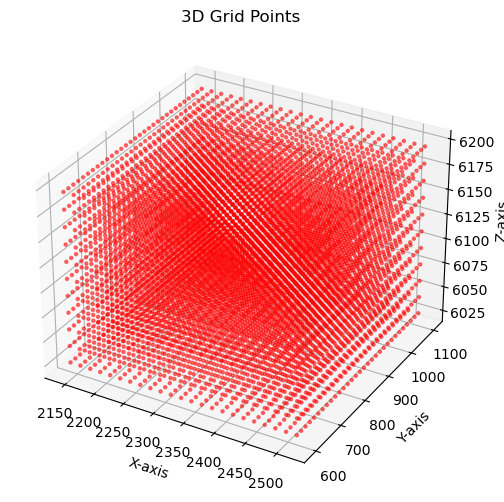

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot grid points
ax.scatter(grid_x, grid_y, grid_z, color="red", s=5, alpha=0.5)

# Labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Grid Points")

plt.show()


In [ ]:
grid_values = interpolate_or_extrapolate(grid_points)  # Use our function from before

In [ ]:
grid_values

array([3.07675783e+10, 4.22282208e+10, 7.53550377e+10, ...,
       2.23444939e+10, 2.23444939e+10, 5.83462974e+10])

In [ ]:
filtered_df['unix_time'].value_counts()

1510504500    99
1511283900    99
1505076897    99
1505076300    99
1505075700    99
              ..
1387544135    24
1444572899    22
1444573499    22
1421375100    22
1486148085    14
Name: unix_time, Length: 27809, dtype: int64

In [ ]:
filtered_df[['unix_time', 'x', 'y', 'z', 'Ne']].duplicated().value_counts()

False    2384630
dtype: int64

# FPI Data

In [ ]:
base_directory = "/Users/elliotdable/Documents/PhD/research/fpi_ml/data/fpi_data/scandinavia/fpi_data"
fpi_df = pd.read_csv('/Users/elliotdable/Documents/PhD/research/fpi_ml/data/fpi_data/scandinavia/indra_fpi_data.csv')

In [ ]:
fpi_df['datetime'] = pd.to_datetime(fpi_df['datetime'])
fpi_df['unix_time'] = (fpi_df['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
fpi_df = fpi_df.round(6).drop_duplicates()
fpi_df = fpi_df.dropna(subset=['observation_latitude', 'observation_longitude', 'altitude'])
fpi_df.head()

,datetime,site,mirror,look_direction,azimuth_angle,altitude,fpi_latitude,fpi_longitude,observation_latitude,observation_longitude,intensity,intensity_error,wind_speed,wind_speed_error,wind_direction,temperature,temperature_error,chi_squared,snr,unix_time
0,2013-09-11 18:51:10,kiruna_red,8,Cal,NaN,240.0,67.87,21.03,67.870000,21.030000,282.03,1.68,2707.04,4.24,NaN,811.44,12.21,0.34,16555.0,1378925470
1,2013-09-11 18:53:46,kiruna_red,7,Zen,NaN,240.0,67.87,21.03,67.870000,21.030000,818.20,5.39,1548.57,5.34,NaN,694.80,11.45,3.49,19154.0,1378925626
2,2013-09-11 18:54:39,kiruna_red,4,W,270.0,240.0,67.87,21.03,67.870000,12.936098,1084.94,7.11,1470.32,5.52,90.0,699.96,11.48,2.00,18045.0,1378925679
3,2013-09-11 18:55:36,kiruna_red,1,N,0.0,240.0,67.87,21.03,70.919049,21.030000,943.89,6.64,1545.55,5.88,180.0,700.00,12.31,2.18,16207.0,1378925736
4,2013-09-11 18:56:29,kiruna_red,11,Kir A,44.0,240.0,67.87,21.03,70.063302,26.652497,881.21,5.18,1547.72,4.94,224.0,696.16,10.24,3.42,23563.0,1378925789


In [ ]:
fpi_df = fpi_df[fpi_df['altitude'] == 240]